In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor

%matplotlib inline

In [3]:
region_info = [
    ("Andorra", "AD", "AND"),
    ("Austria", "AT",  "AUT"),
    ("Albania","AL","ALB"),
    ("Bosnia and Herzegovina", "BA", "BIH"),
    ("Belgium", "BE", "BEL"),
    ("Bulgaria",  "BG", "BGR"),
    ("Switzerland", "CH", "CHE"),
    ("Czech Republic", "CZ", "CZE"),
    ("Germany", "DE", "DEU"),
    ("Denmark", "DK", "DNK"),
    ("Estonia","EE", "EST"),
    ("Spain", "ES", "ESP"),
    ("Finland", "FI", "FIN"),
    ("France", "FR", "FRA"),
    ("United Kingdom", "GB", "GBR"), 
    ("Georgia","GE","GEO"),
    ("Greece", "GR", "GRC"),
    ("Croatia", "HR", "HRV"),
    ("Hungary", "HU", "HUN"),
    ("Ireland", "IE", "IRL"),
    ("Israel", "IL", "ISR"),
    ("Iceland", "IS", "ISL"),
    ("Italy", "IT", "ITA"),
    ("Lithuania","LT","LTU"),
    ("Latvia","LV","LVA"),
    ("Malta","MT","MLT"),
    ("Morocco", "MA", "MAR"),
    ("Mexico","MX", "MEX"),
    ("Malaysia", "MY", "MYS"),
    ("Netherlands", "NL", "NLD"),
    ("Norway","NO","NOR"),
    ("New Zealand","NZ","NZL"),
    ("Poland","PL", "POL"),
    ("Portugal","PT","PRT"),
    ("Romania","RO", "ROU"),
    ("Serbia", "RS", "SRB"),
    ("Sweden", "SE", "SWE"),
    ("Singapore", "SG", "SGP"),
    ("Slovenia", "SI", "SVN"),
    ("Slovakia", "SK", "SVK"),
    ("South Africa", "ZA",  "ZAF"),
]

region_info.sort(key = lambda x: x[0])
region_names = list([x for x, _, _ in region_info])
regions_epi = list([x for _, x, _ in region_info])

In [4]:
dp = DataPreprocessor()
data = dp.preprocess_data("double_entry_final.csv", last_day="2020-05-30")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Travel Screen/Quarantine
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Travel Bans
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Public Transport Limited
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Internal Movement Limited
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Public Information Campaigns
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Symptomatic Testing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Georgia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
IN

In [54]:
data.Ds[30]

Timestamp('2020-02-21 00:00:00+0000', tz='UTC')

In [59]:
data.NewCases[19, 30]

0.0

[('北', 'black'), ('\uf0c0', 'lightgrey'), ('\uf0c0', 'grey'), ('\uf0c0', 'black'), ('\uf07a', 'tab:orange'), ('\uf07a', 'tab:red'), ('\uf549', 'black'), ('\uf19d', 'black'), ('便', 'black'), ('\uf072', 'grey'), ('\uf072', 'black'), ('\uf238', 'black'), ('\uf1b9', 'black'), ('\uf641', 'black')]


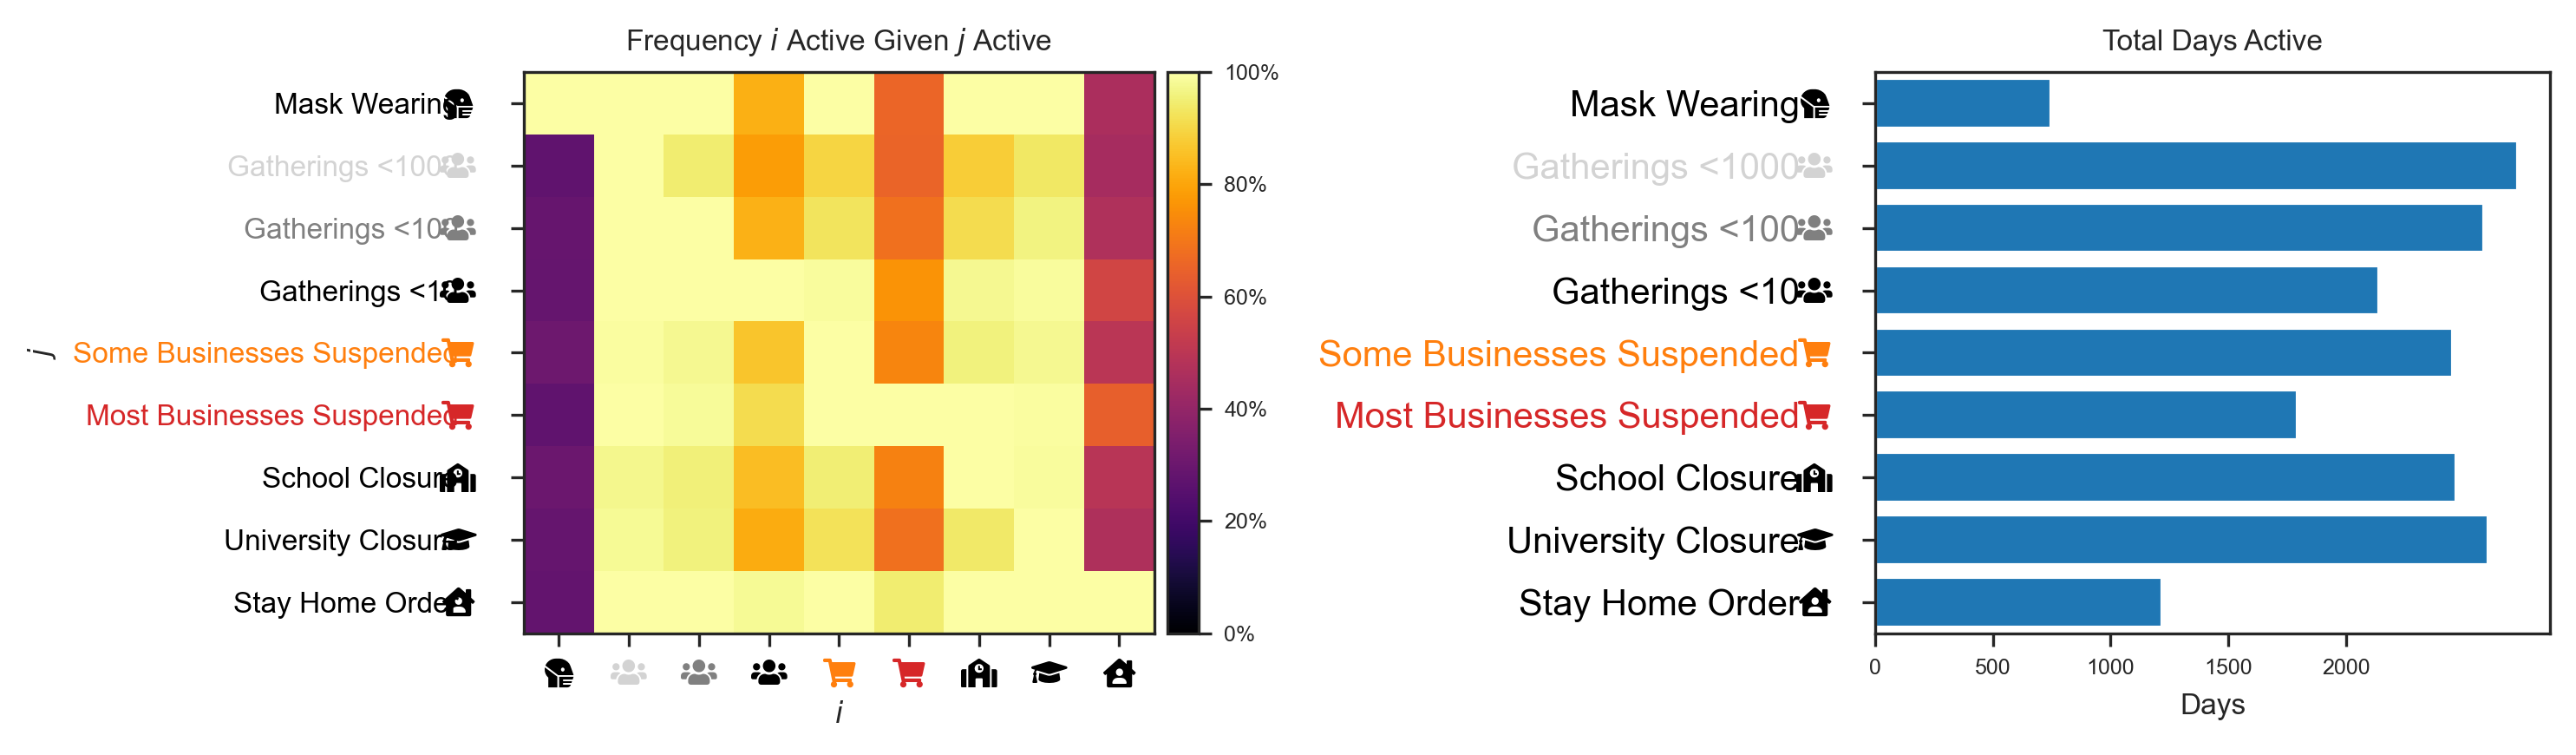

In [79]:
cm_plot_style = [
#             ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2
            ("\uf549", "black"), # school
            ("\uf19d", "black"), # university
            ("\uf965", "black"), # home
            ("\uf072", "grey"), # plane1
            ("\uf072", "black"), # plane2
            ("\uf238", "black"), # train
            ("\uf1b9", "black"), # car
            ("\uf641", "black") # flyer
        ]

data.summary_plot(cm_plot_style)

[('北', 'black'), ('\uf0c0', 'lightgrey'), ('\uf0c0', 'grey'), ('\uf0c0', 'black'), ('\uf07a', 'tab:orange'), ('\uf07a', 'tab:red'), ('\uf549', 'black'), ('\uf19d', 'black'), ('便', 'black'), ('\uf072', 'grey'), ('\uf072', 'black'), ('\uf238', 'black'), ('\uf1b9', 'black'), ('\uf641', 'black')]


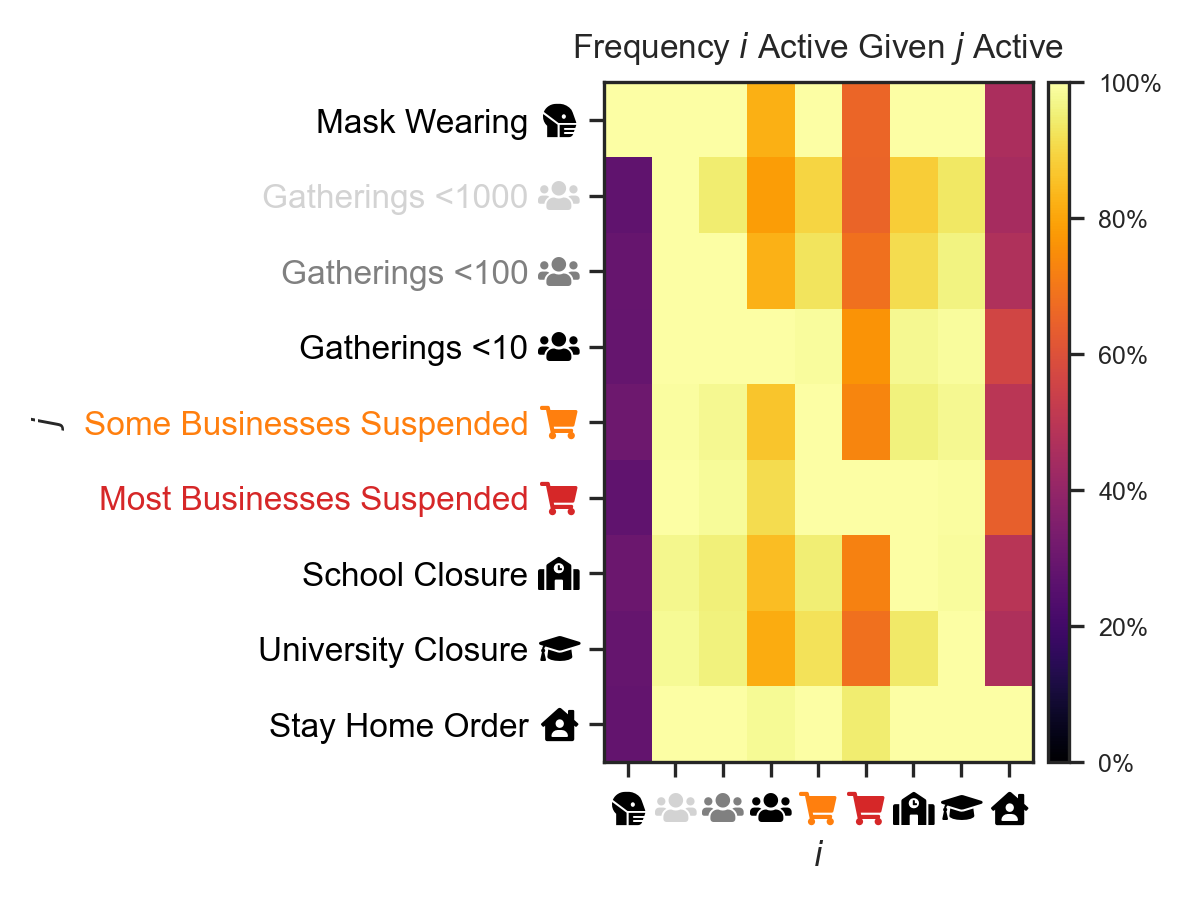

In [81]:
data.coactivation_plot(cm_plot_style)

2020-05-30 00:00:00+00:00
Andorra, 51.0
Estonia, 67.0
Lithuania, 70.0


/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7

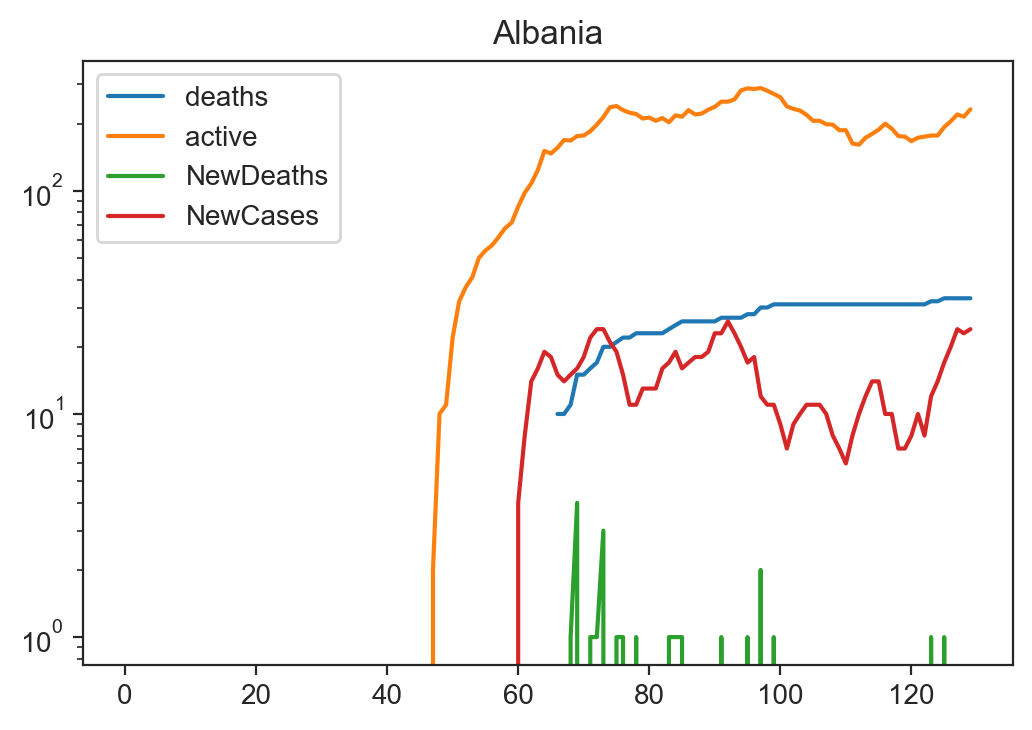

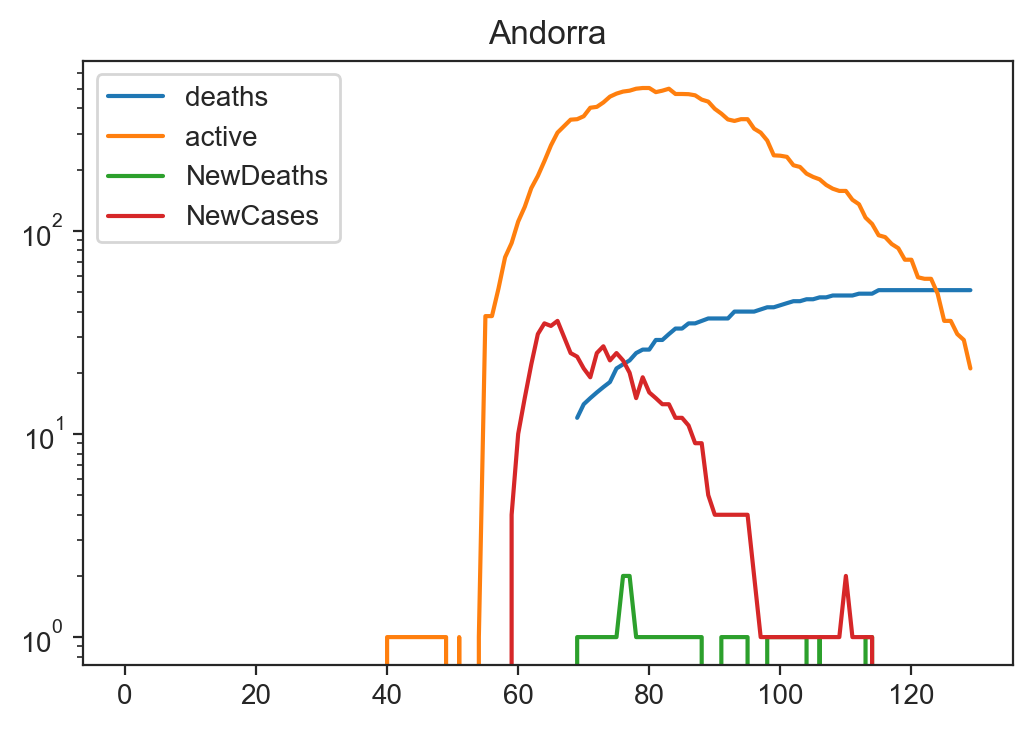

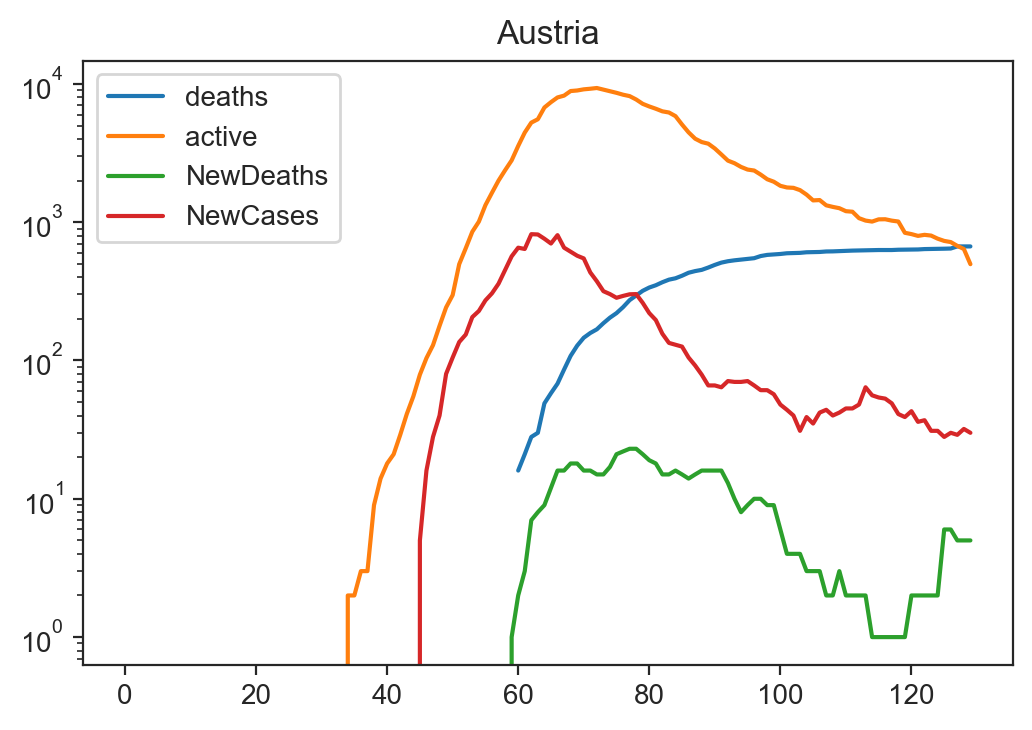

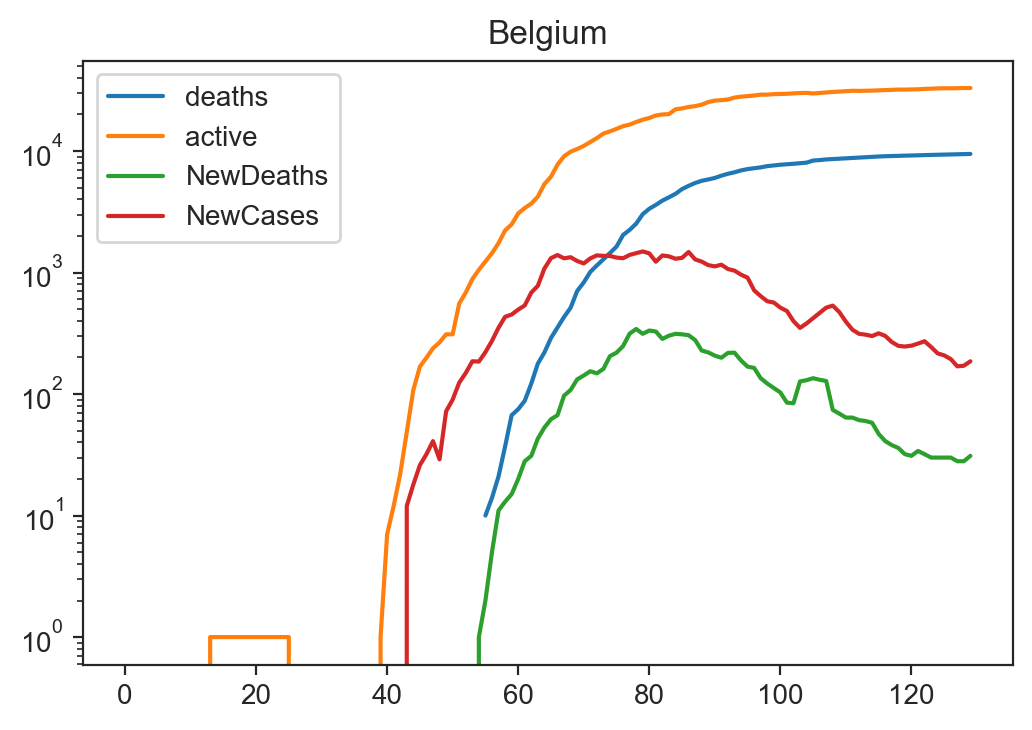

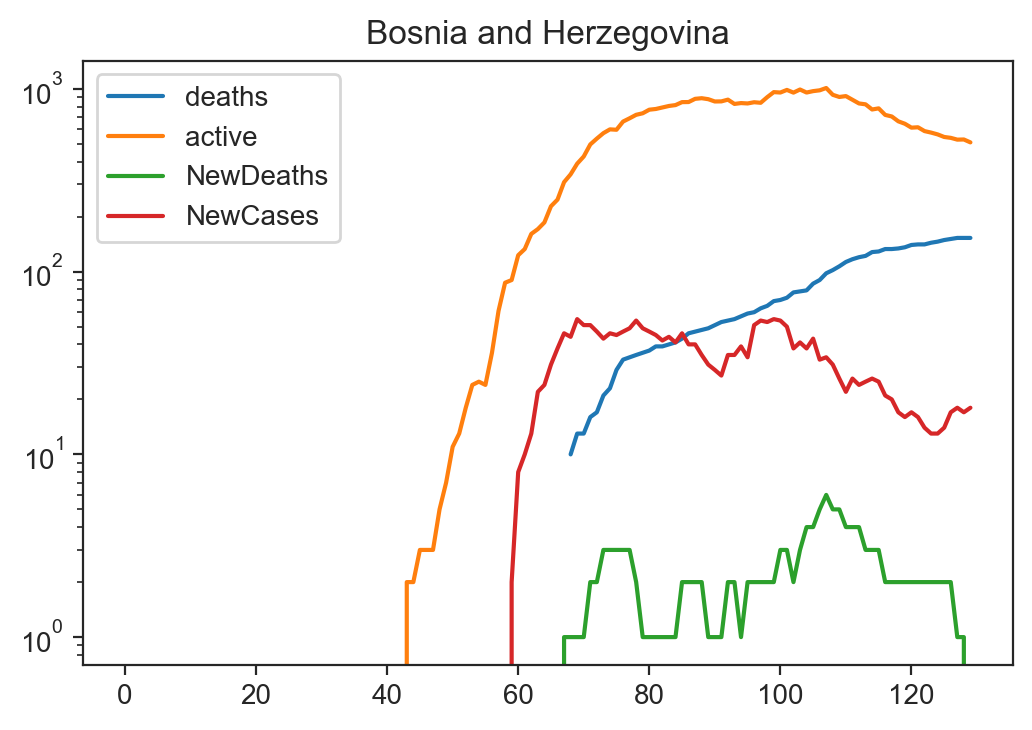

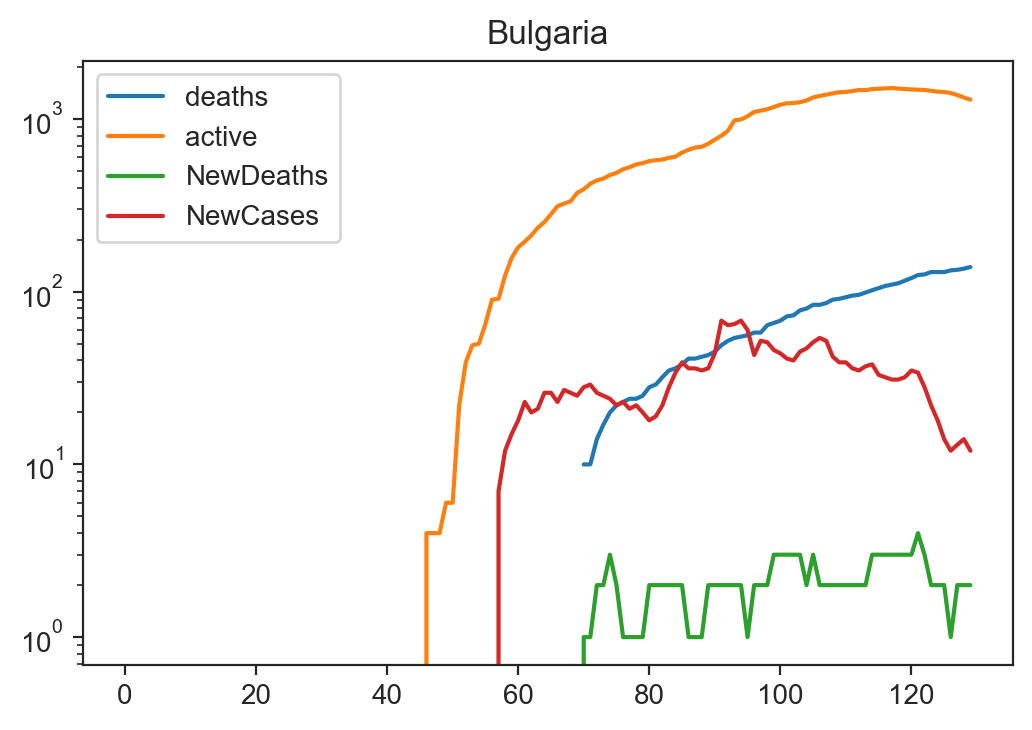

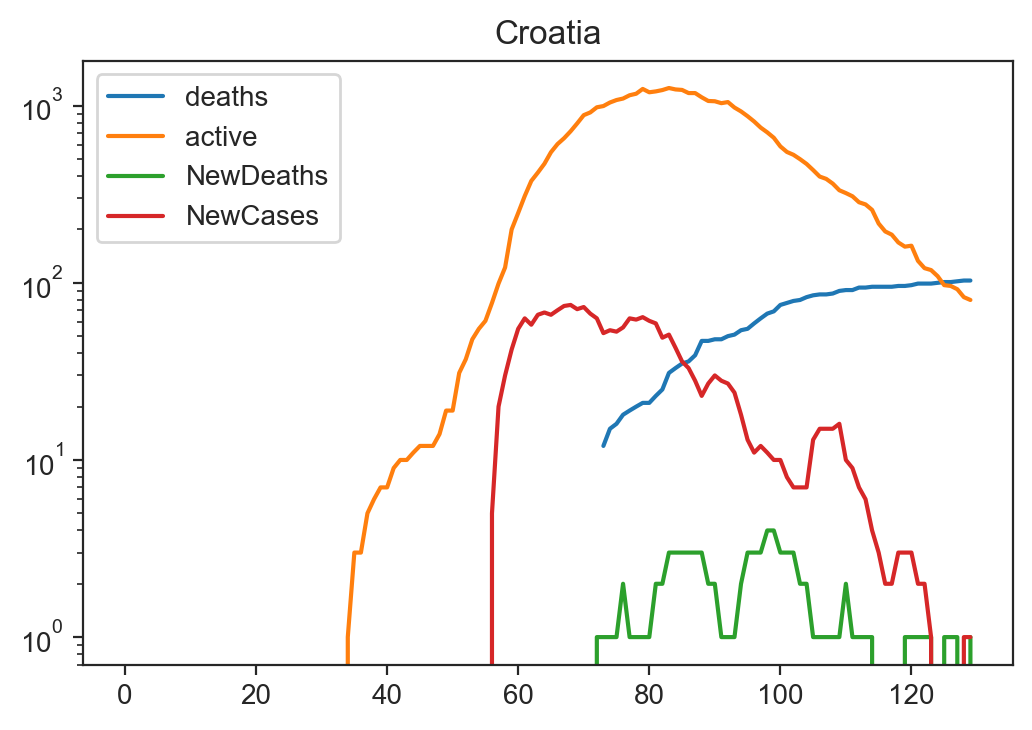

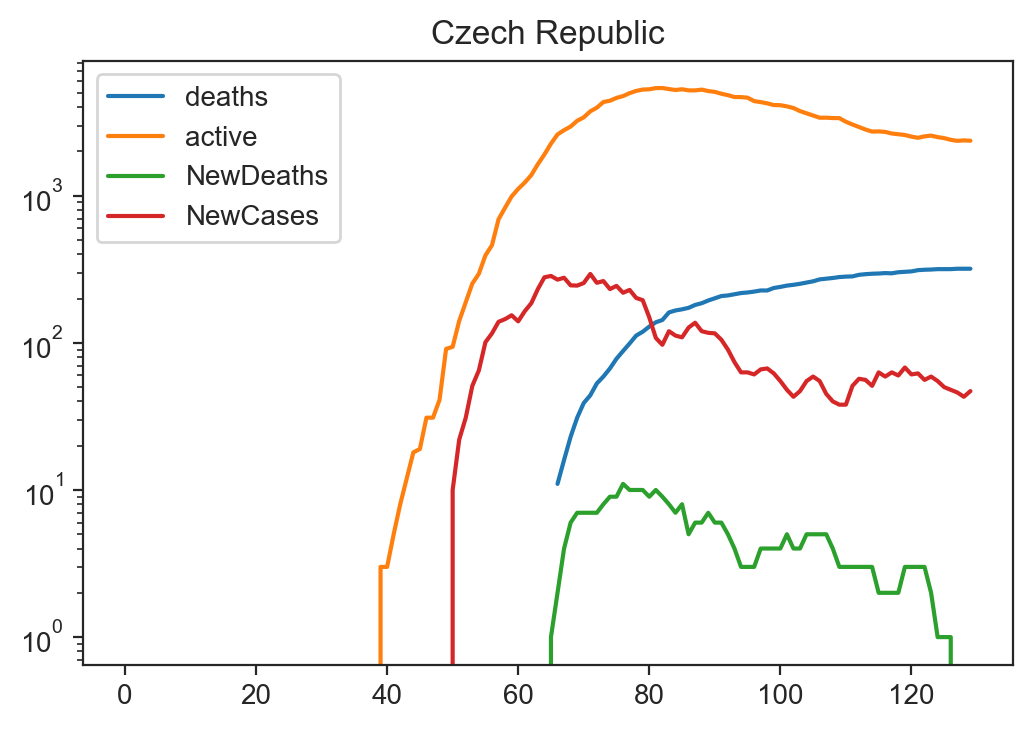

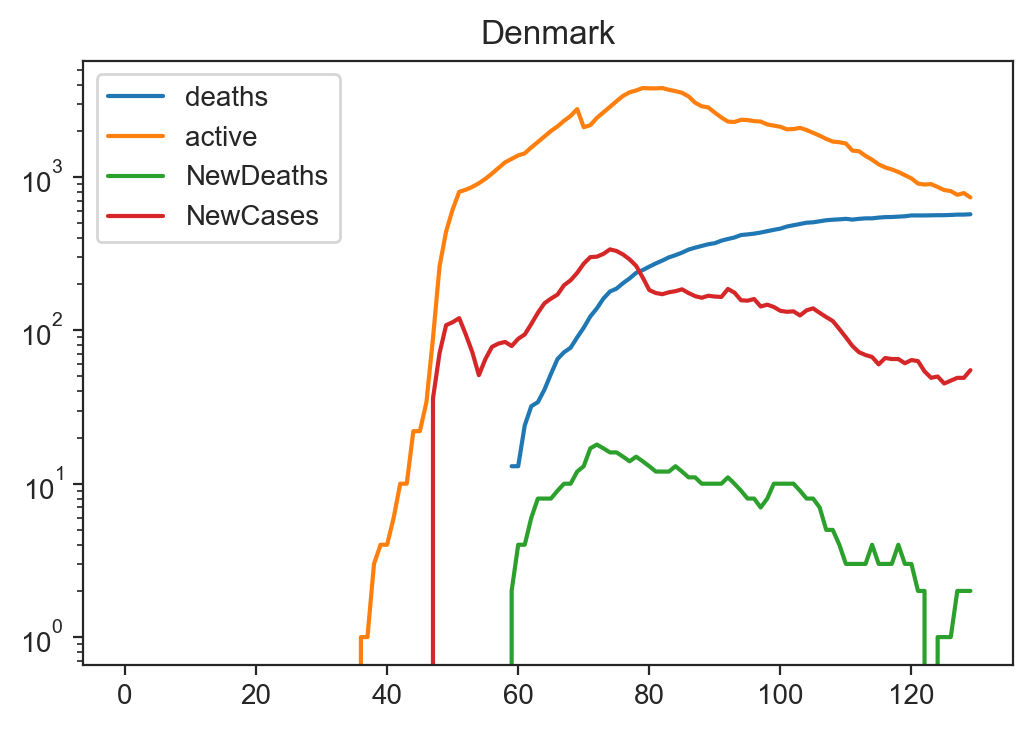

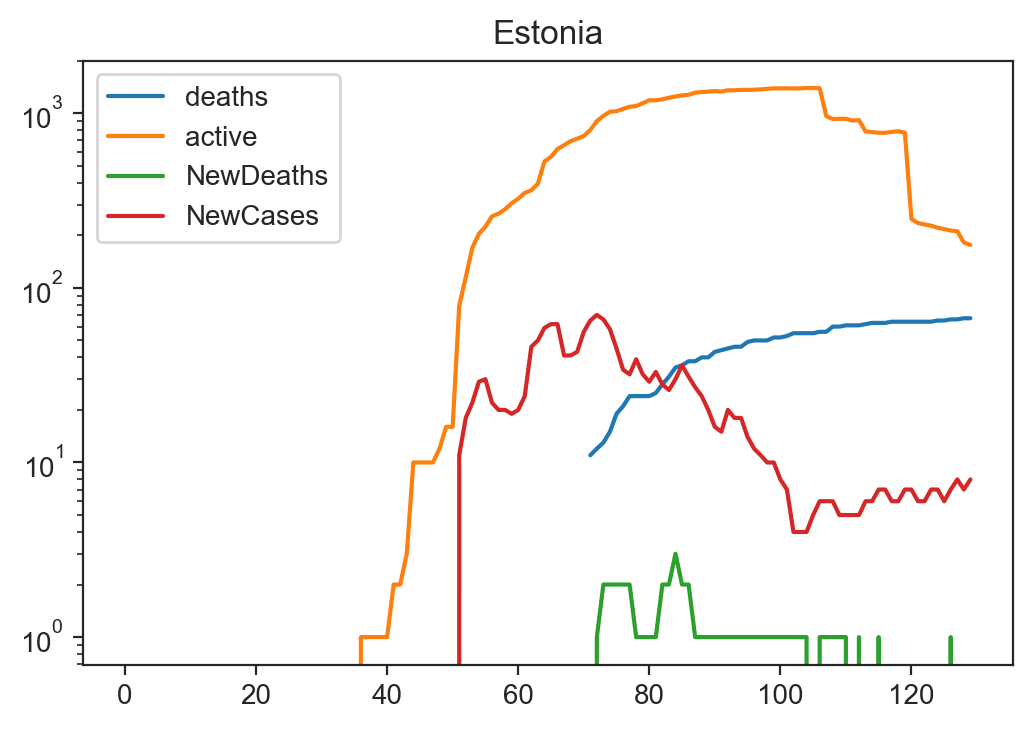

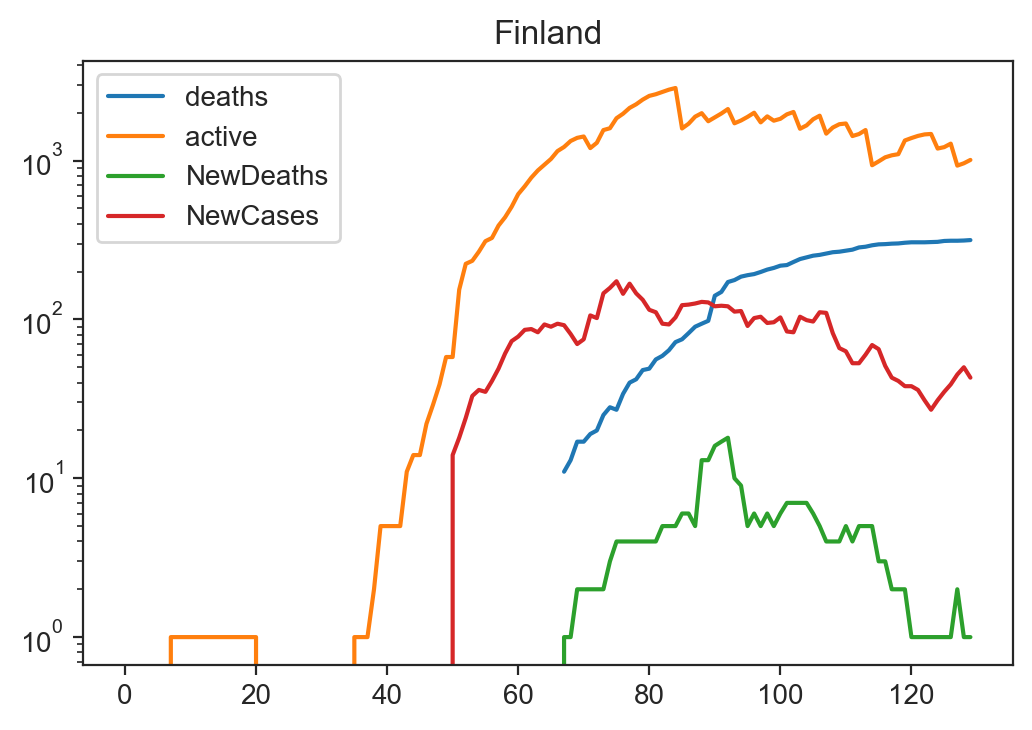

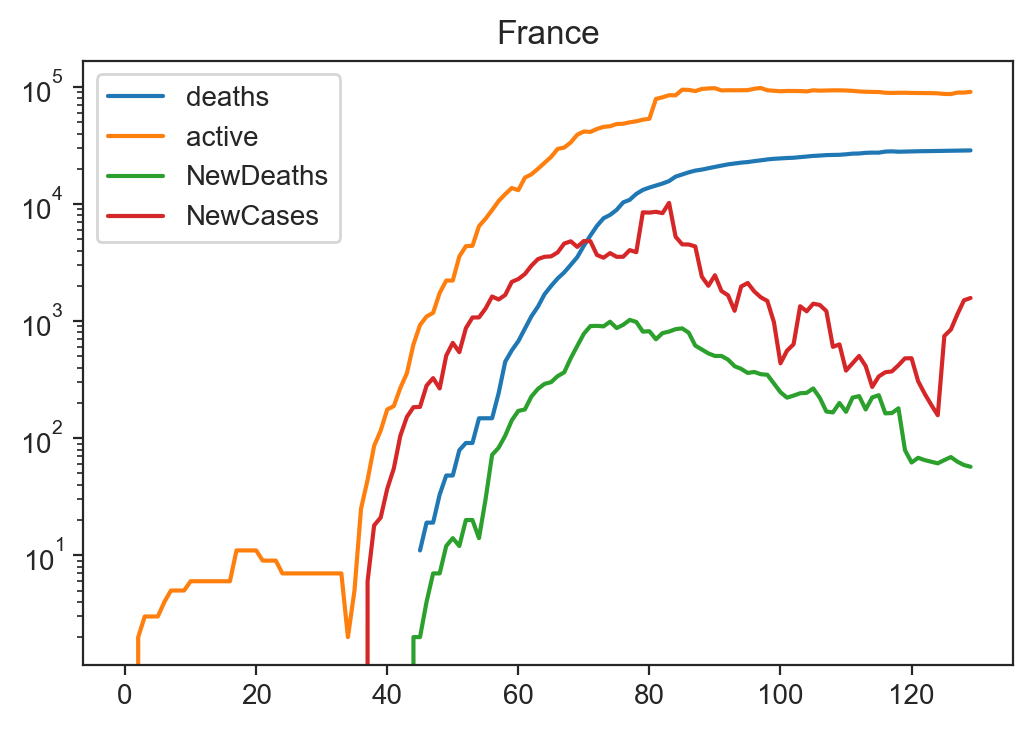

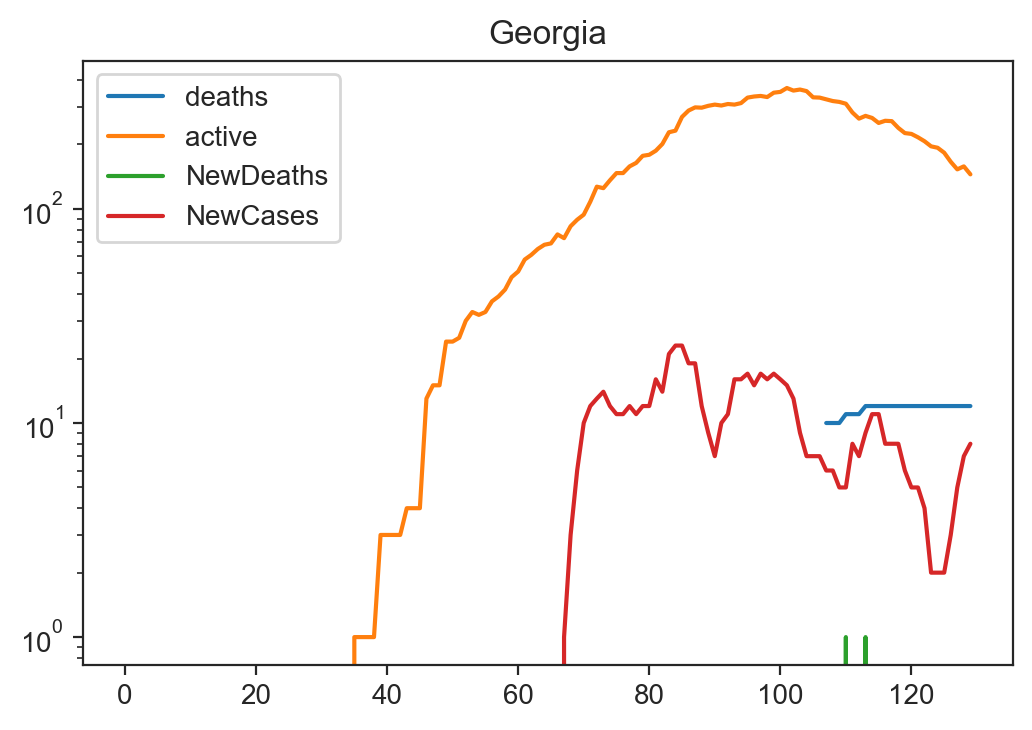

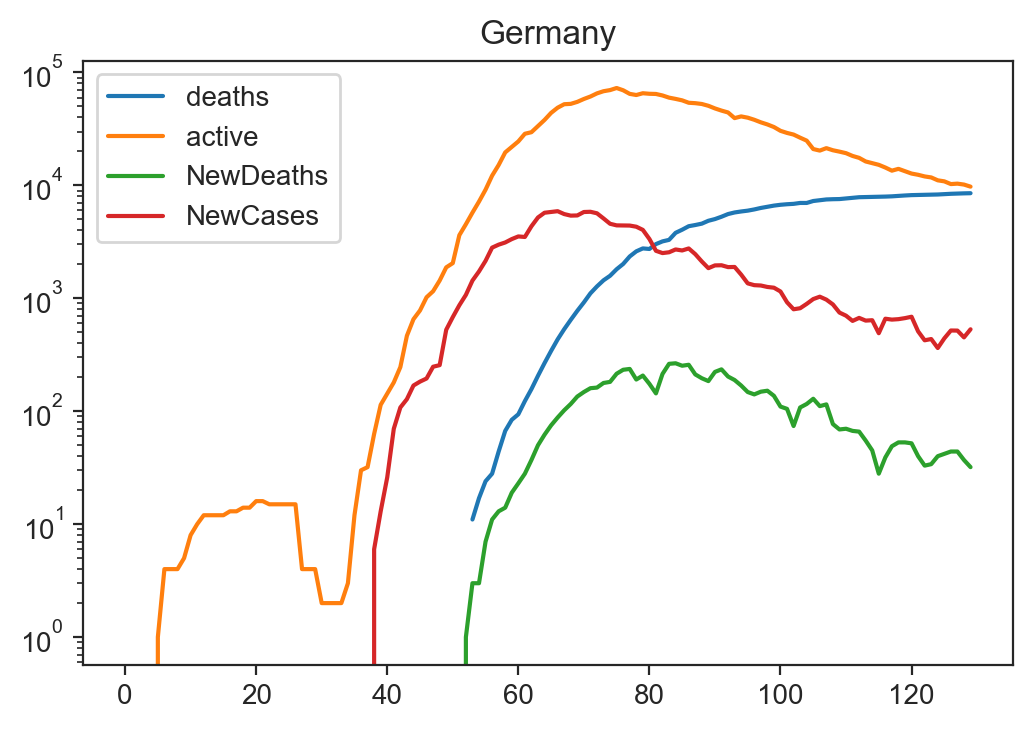

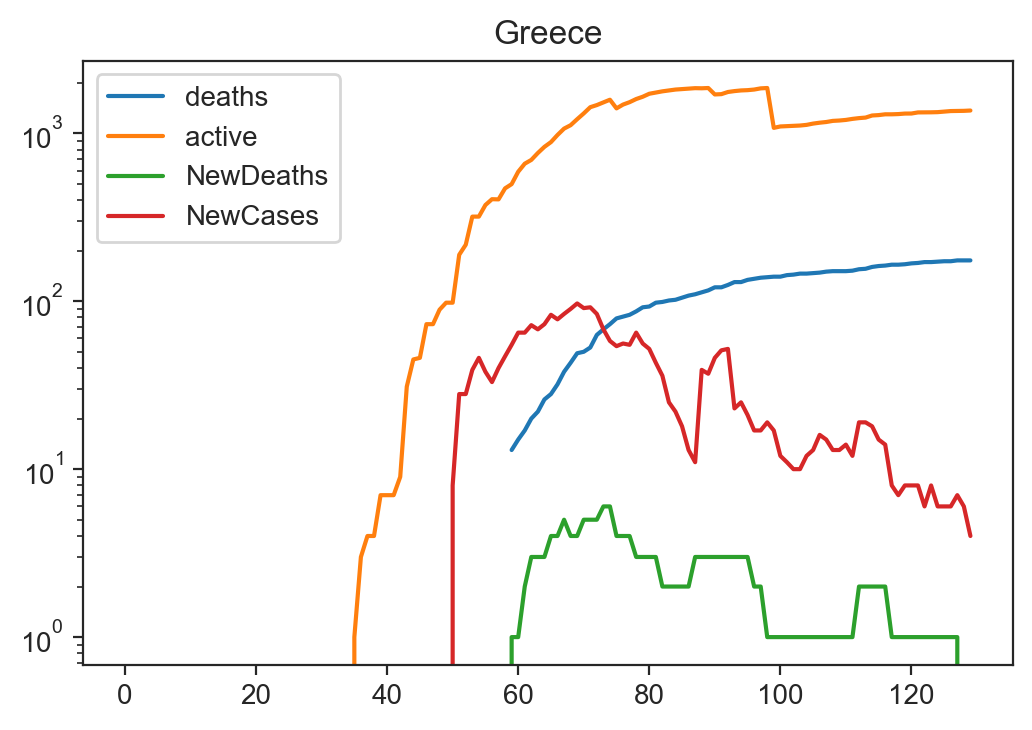

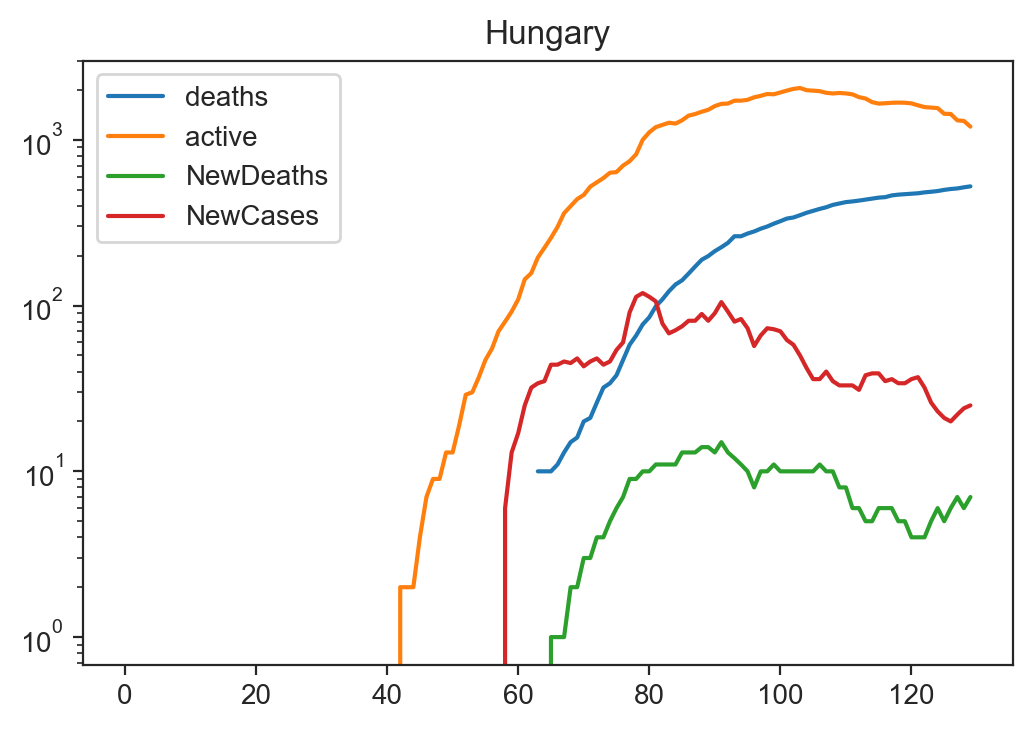

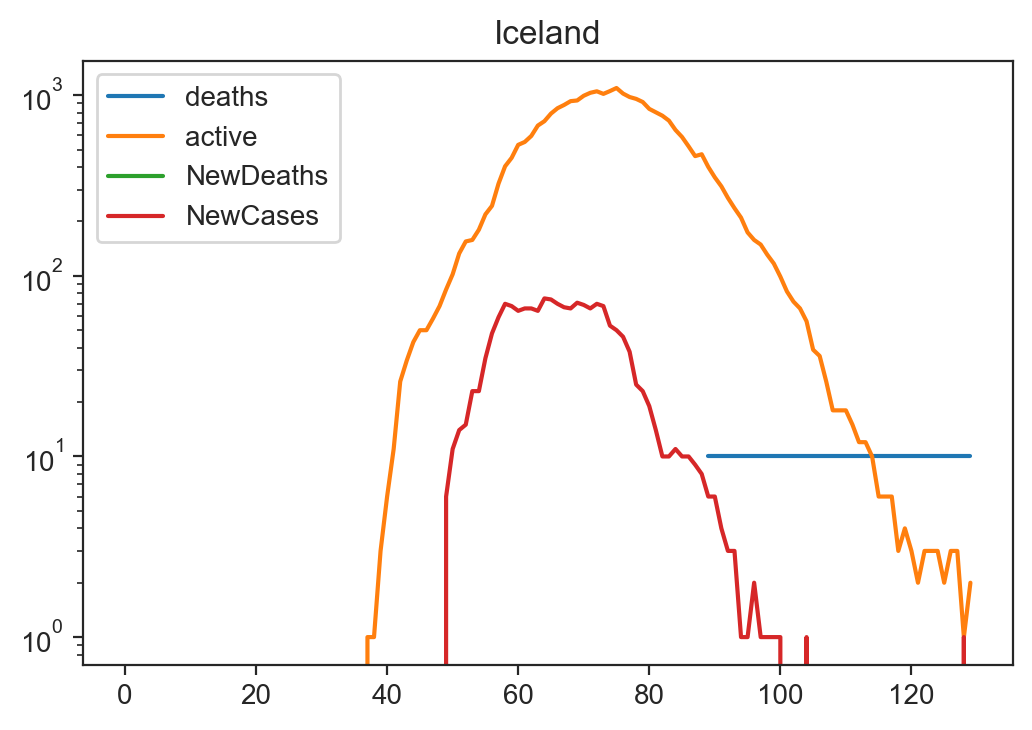

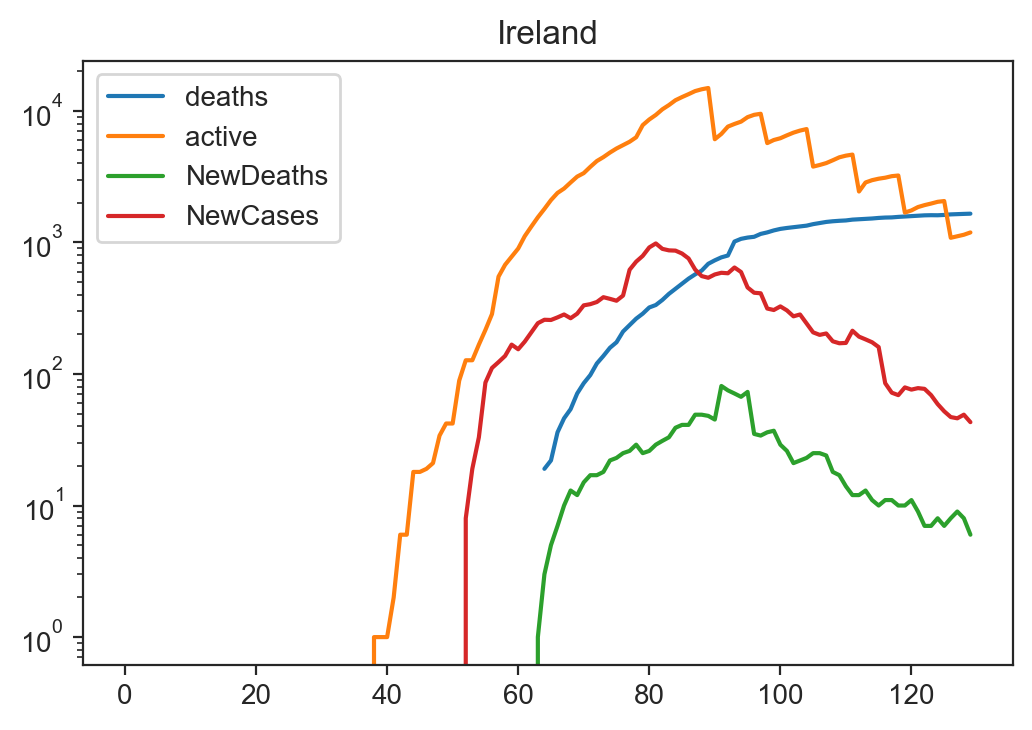

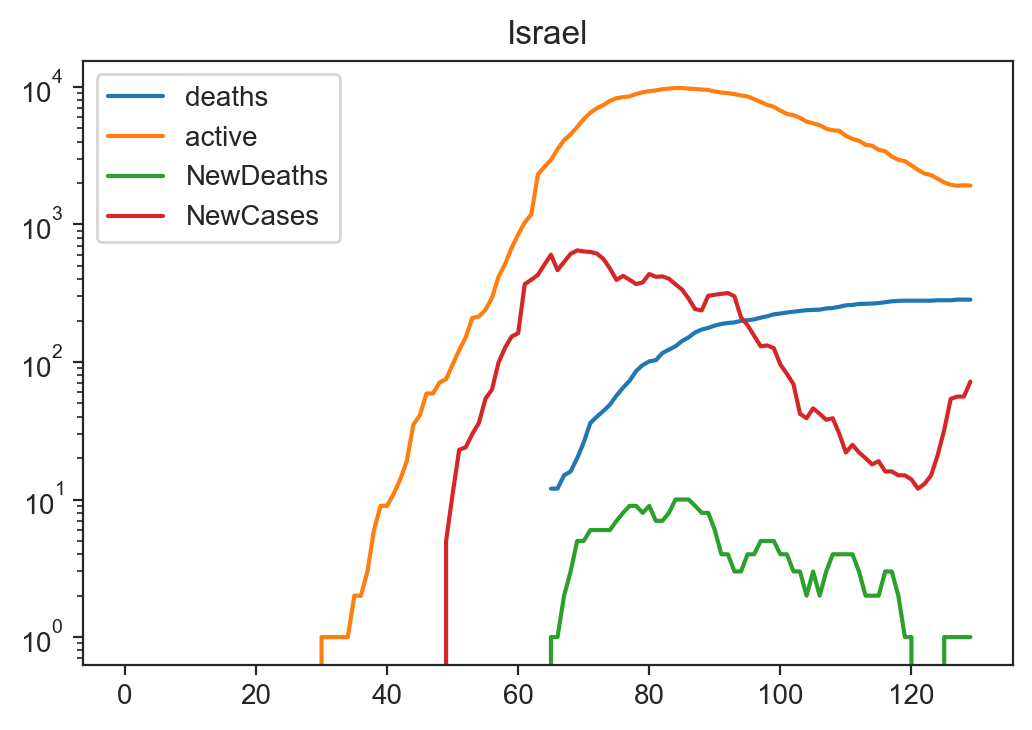

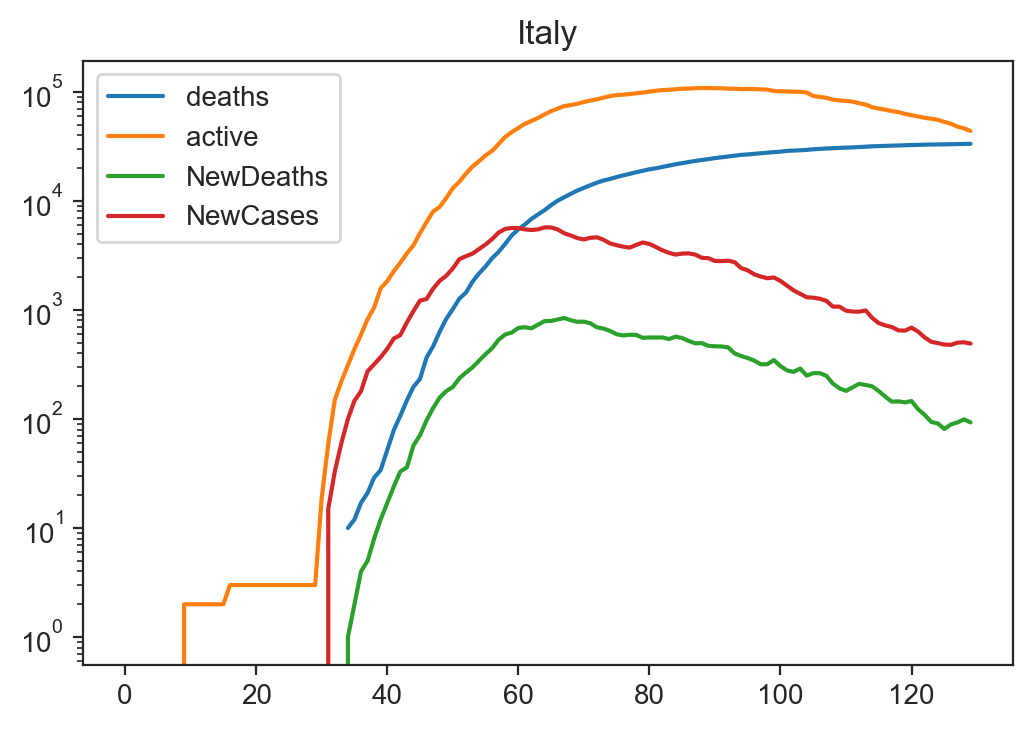

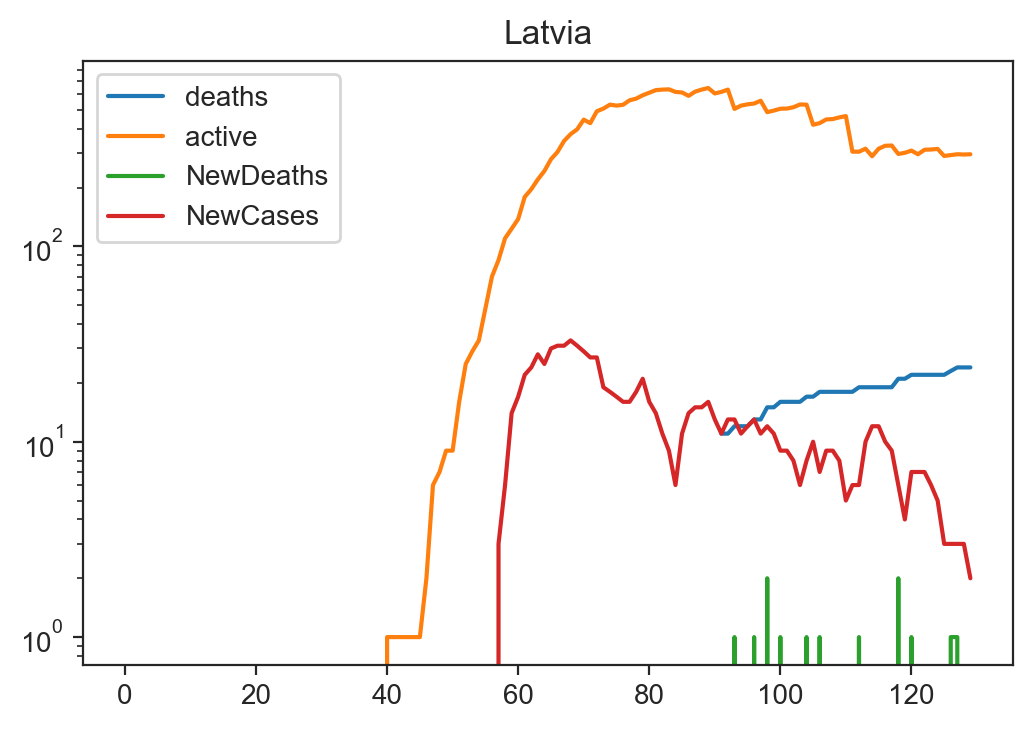

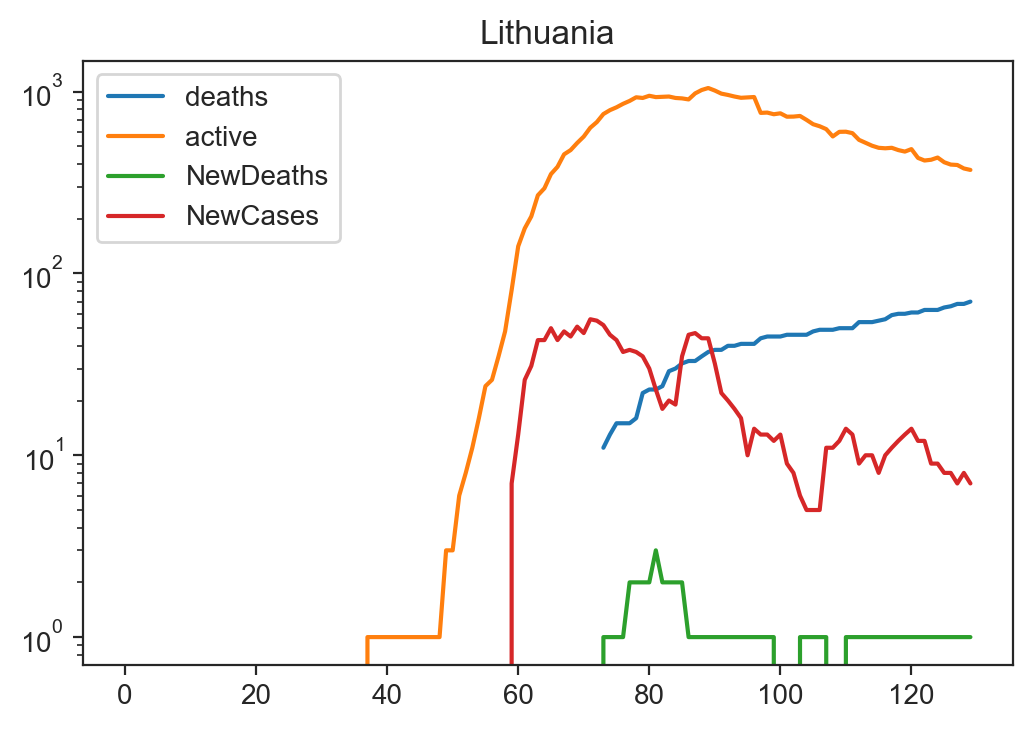

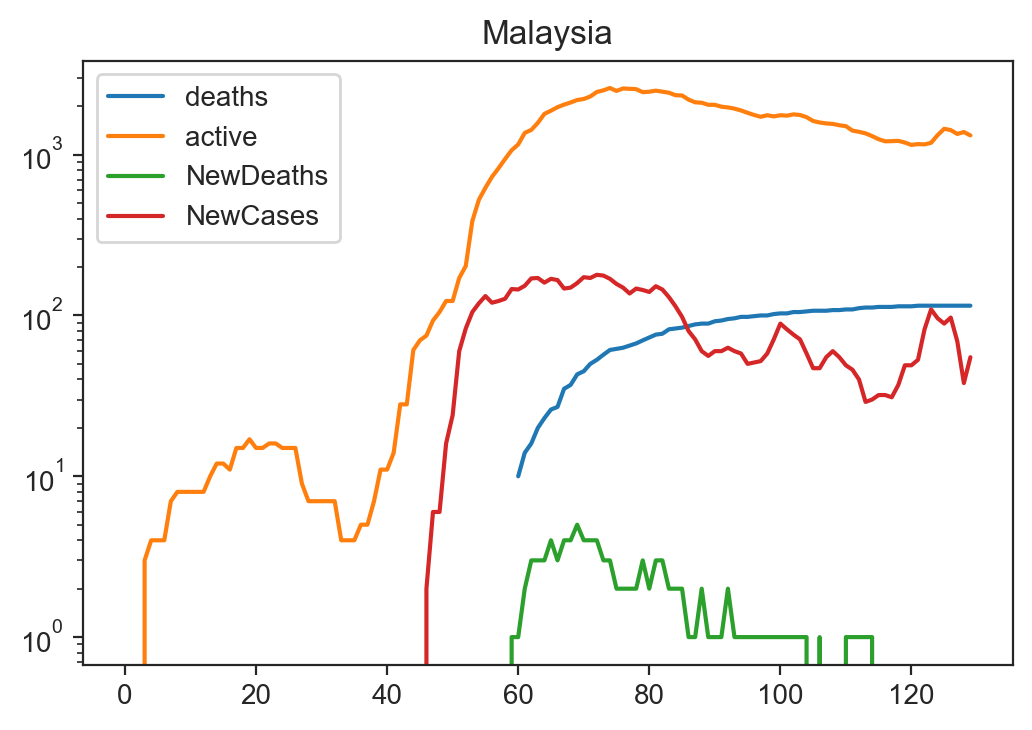

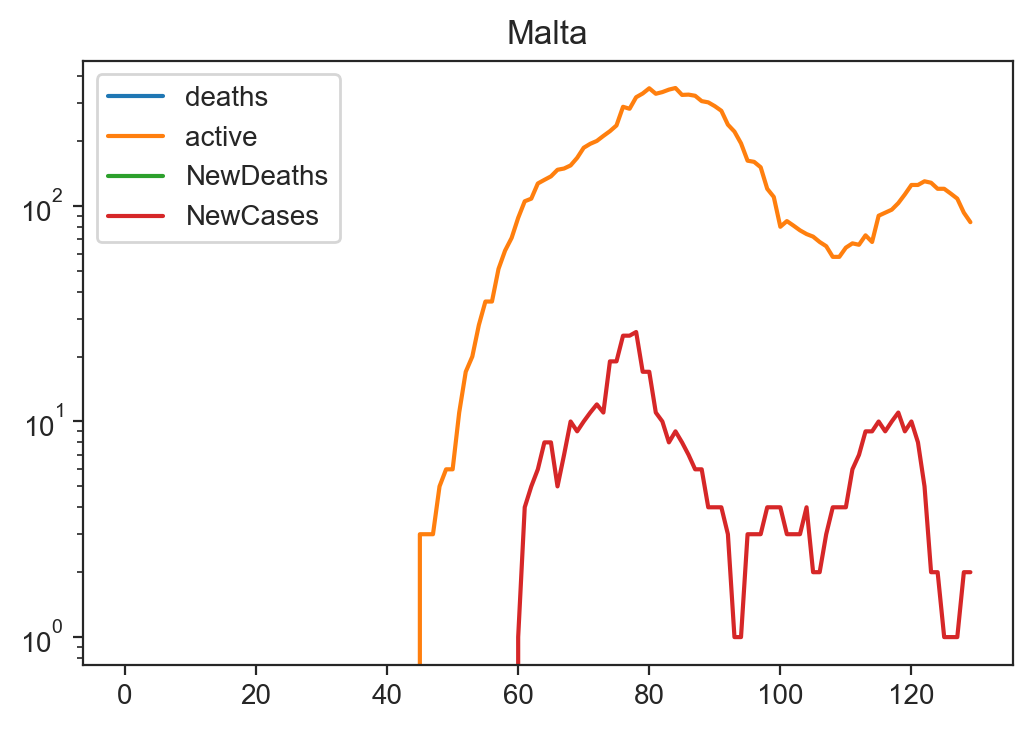

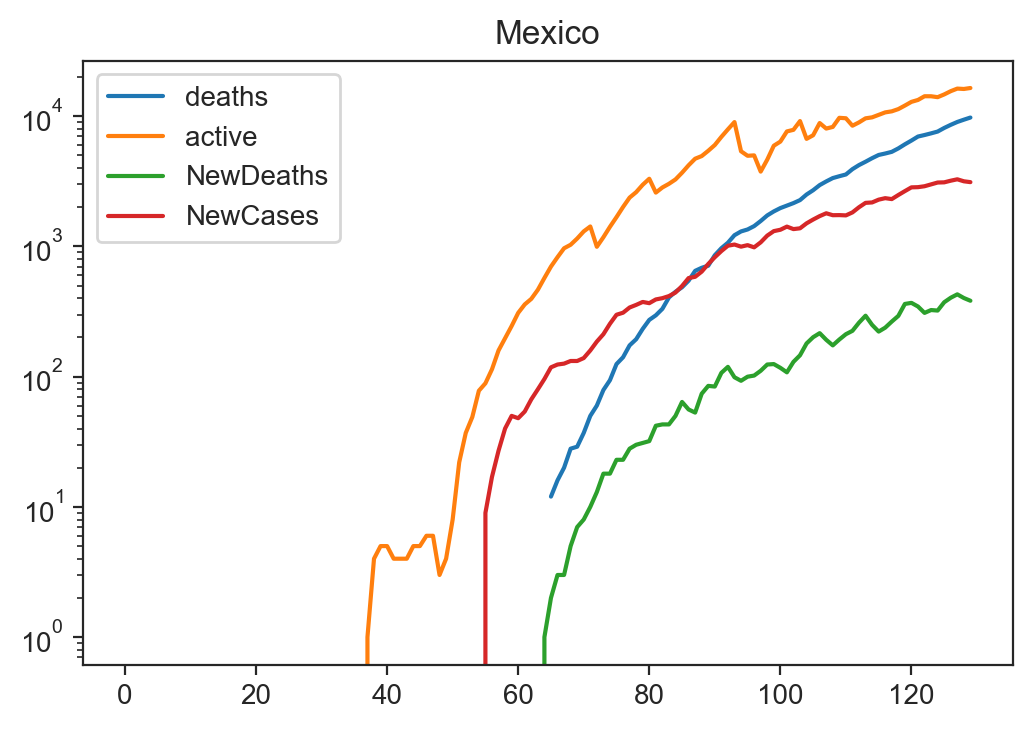

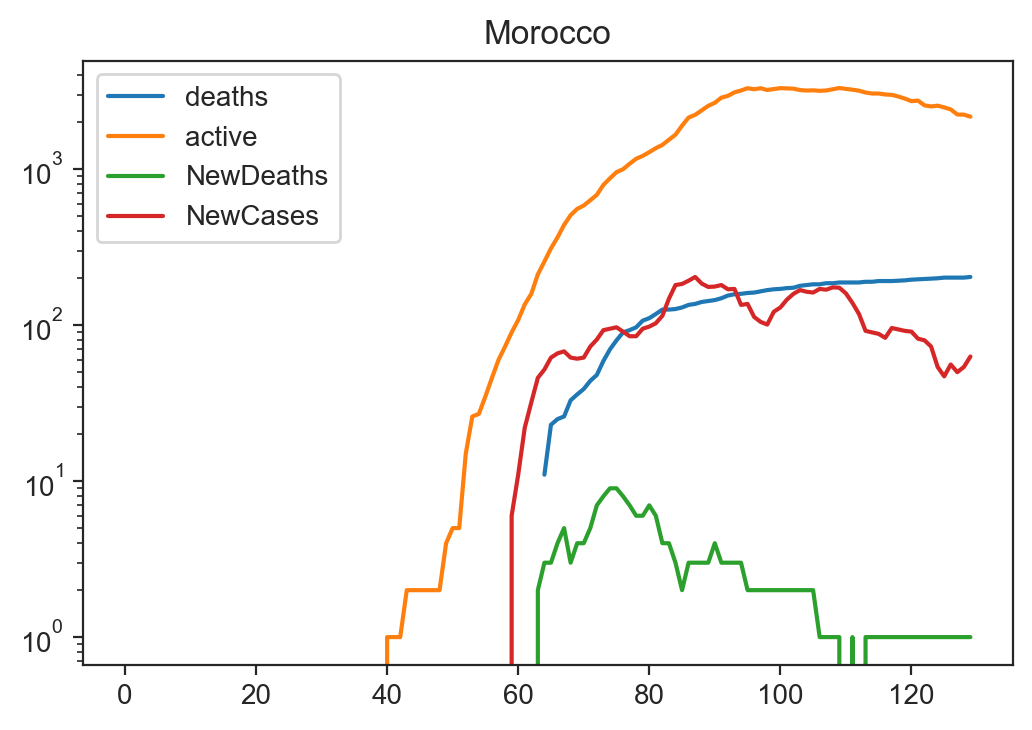

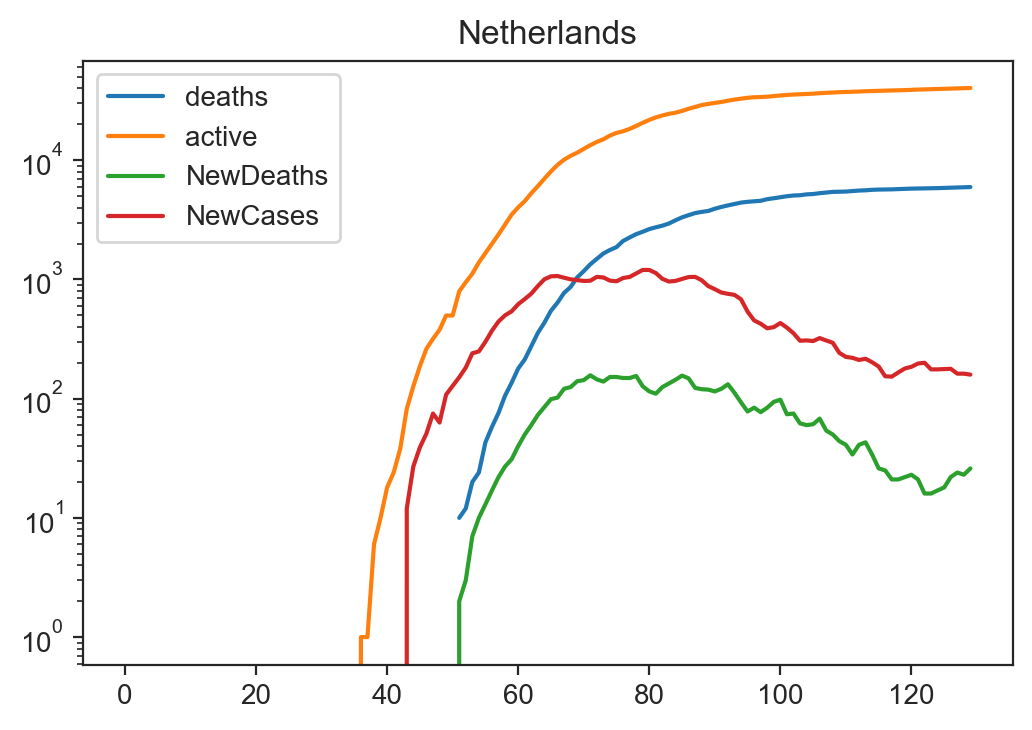

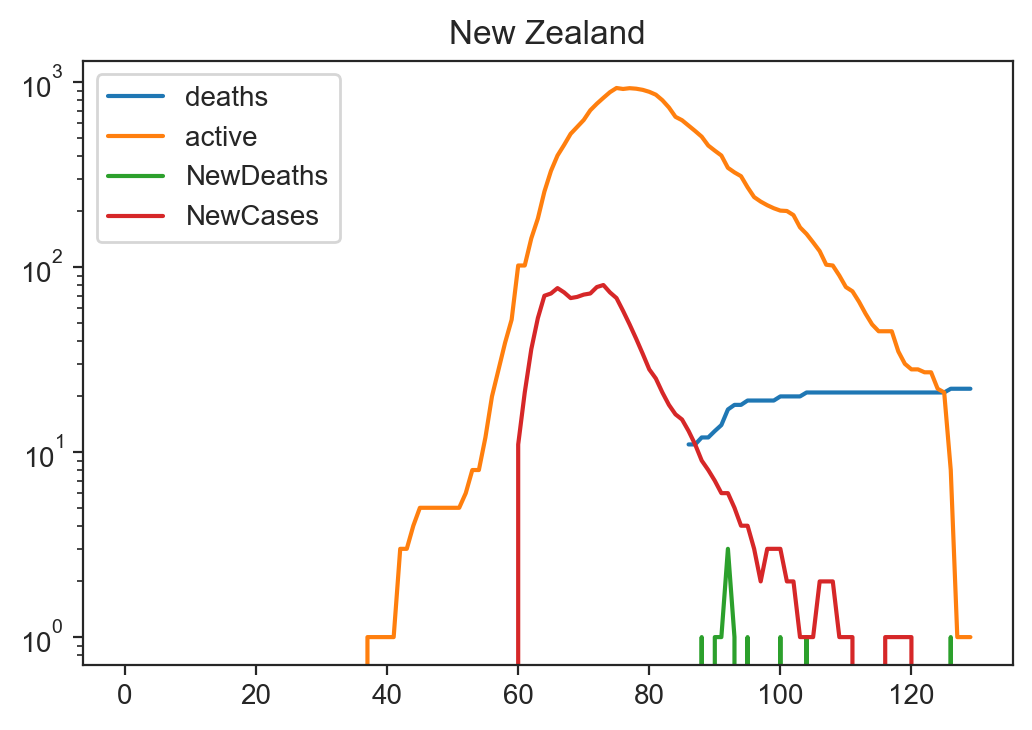

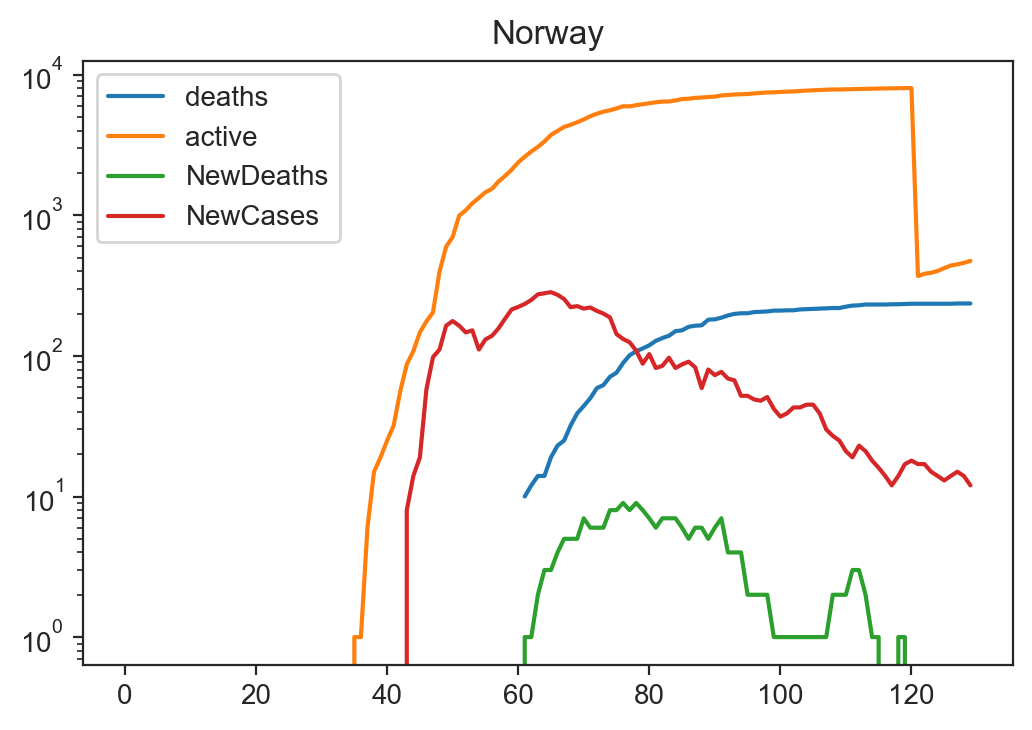

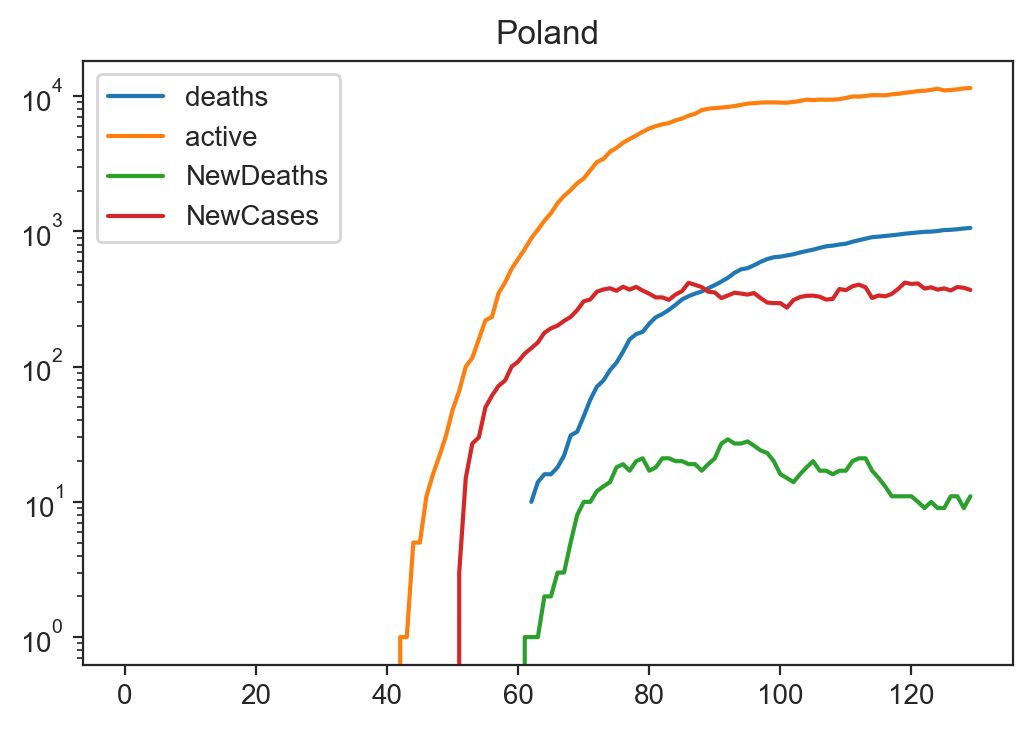

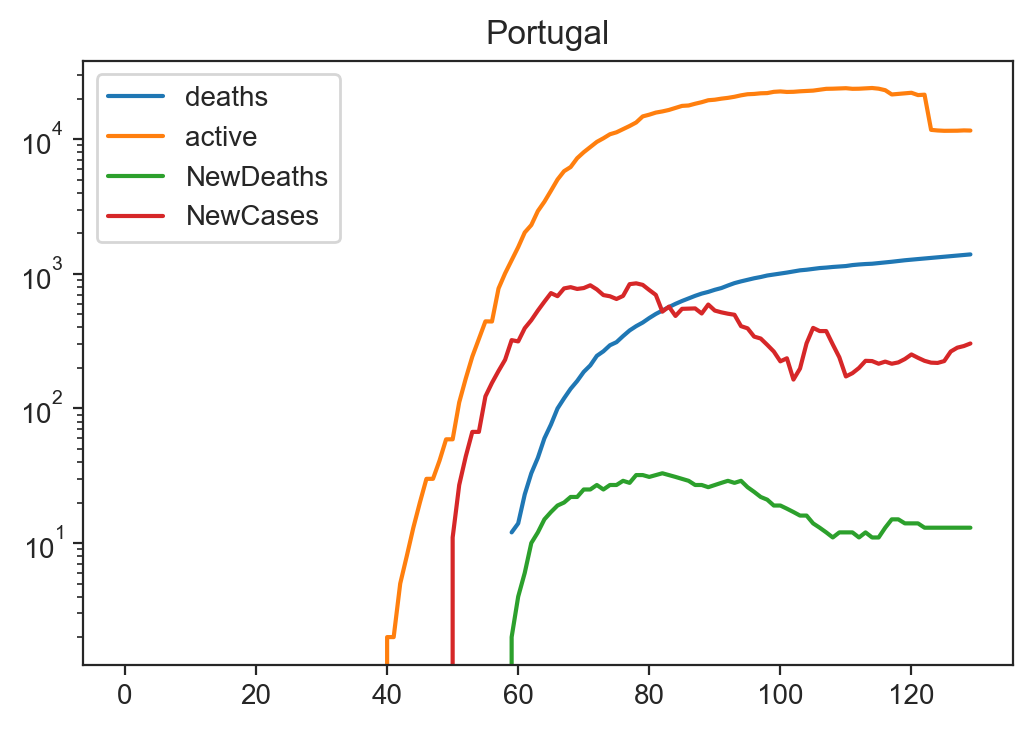

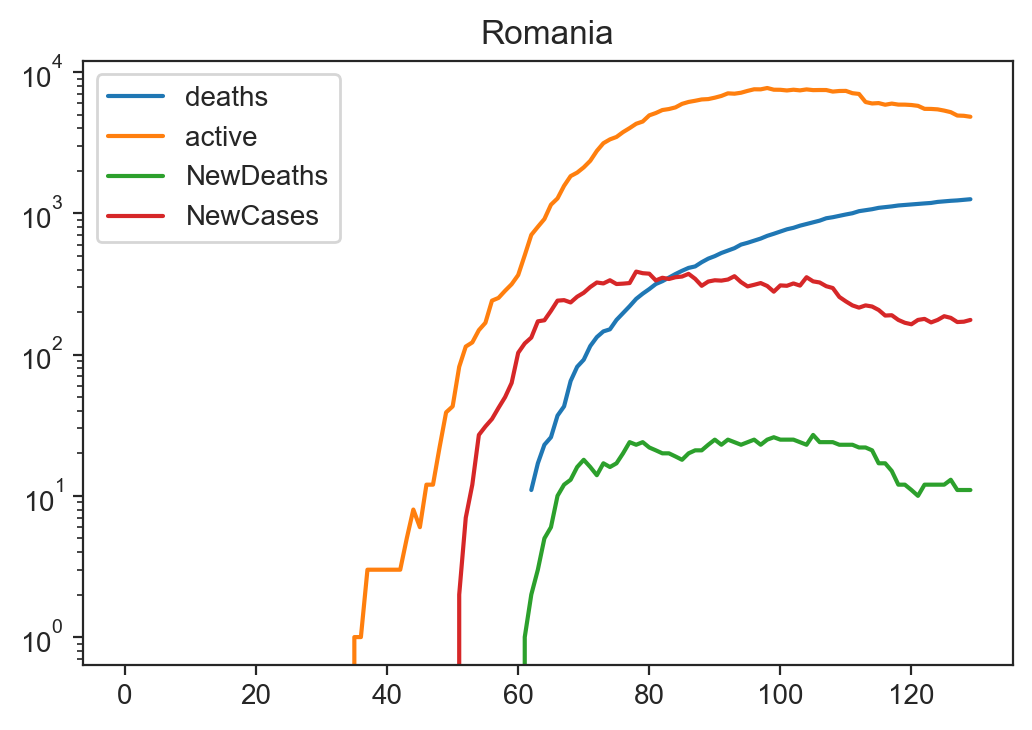

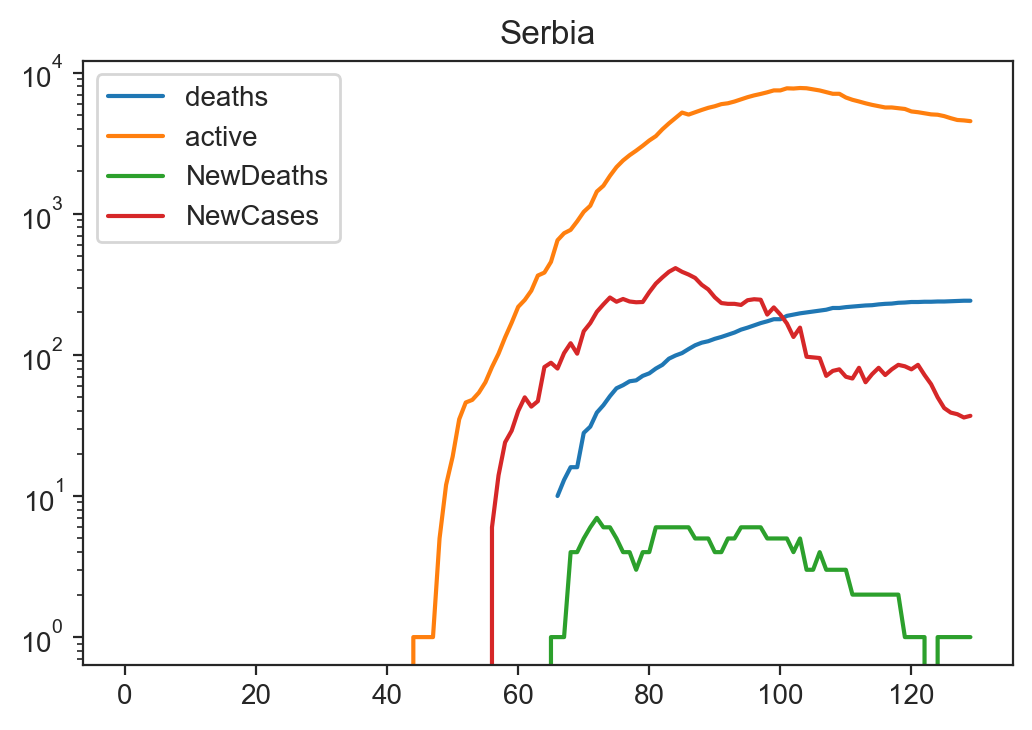

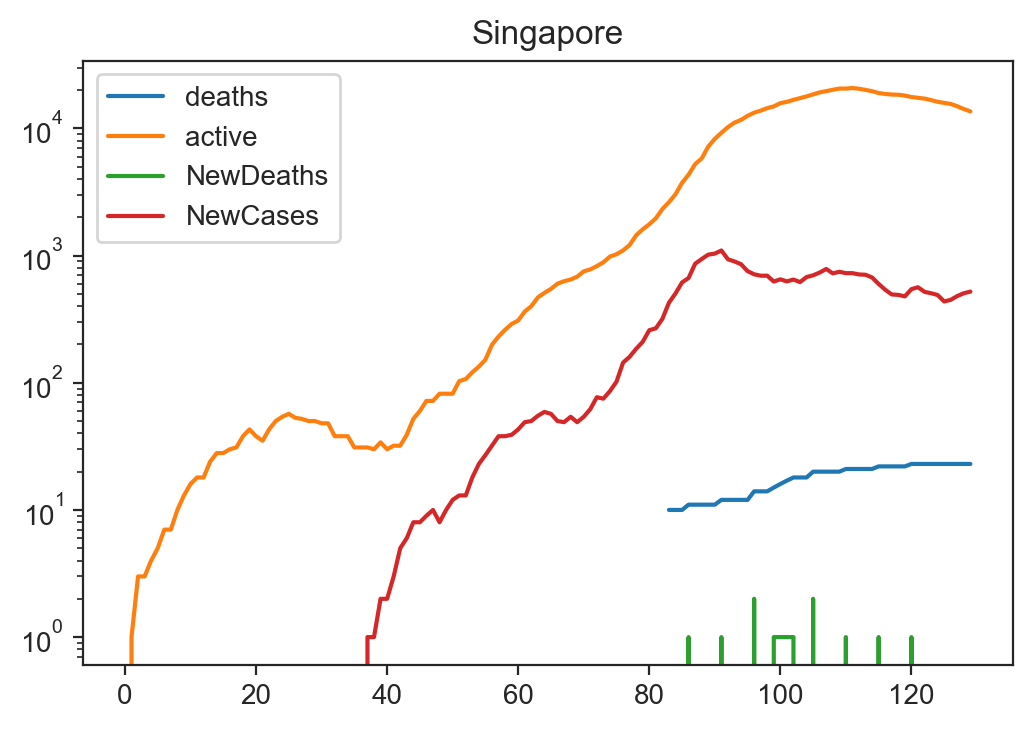

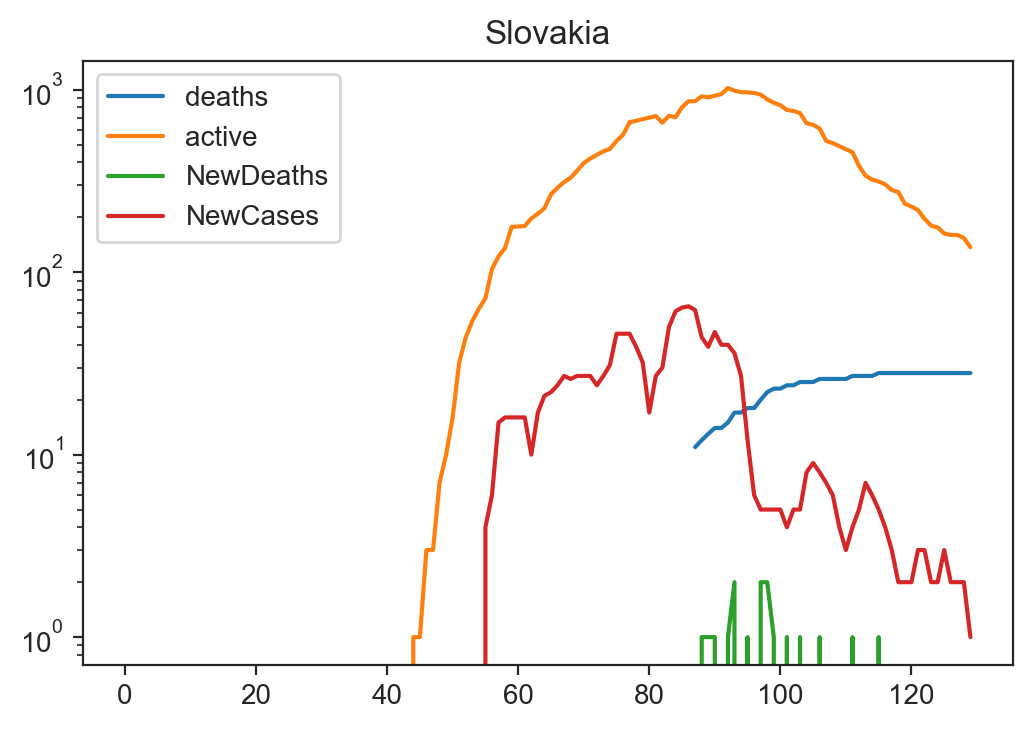

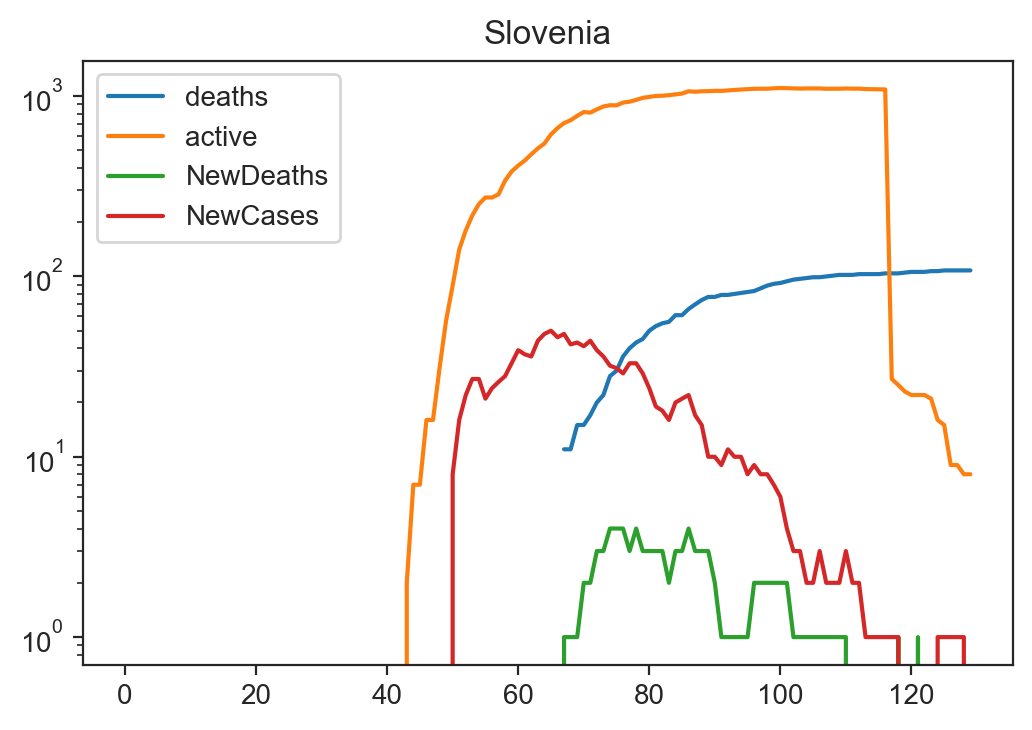

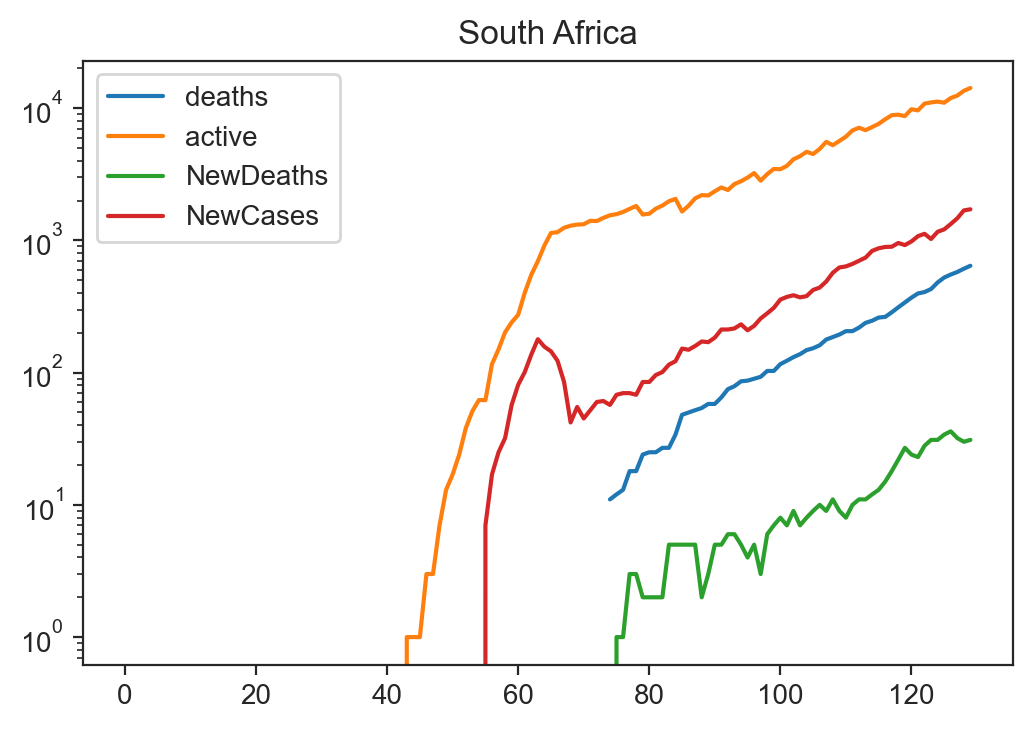

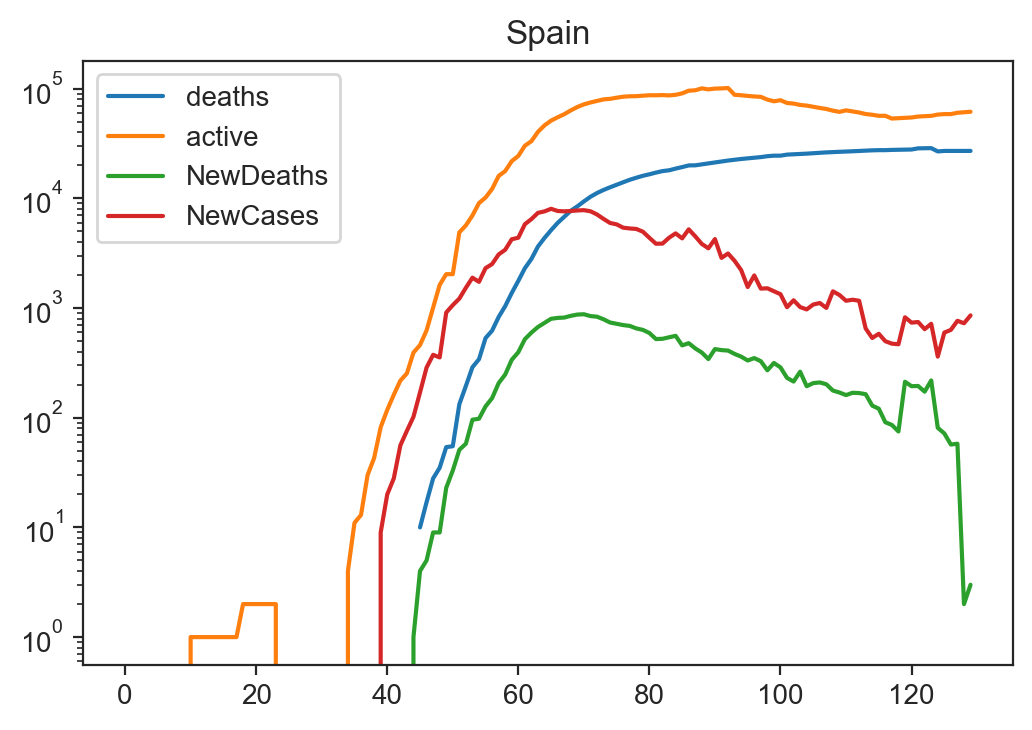

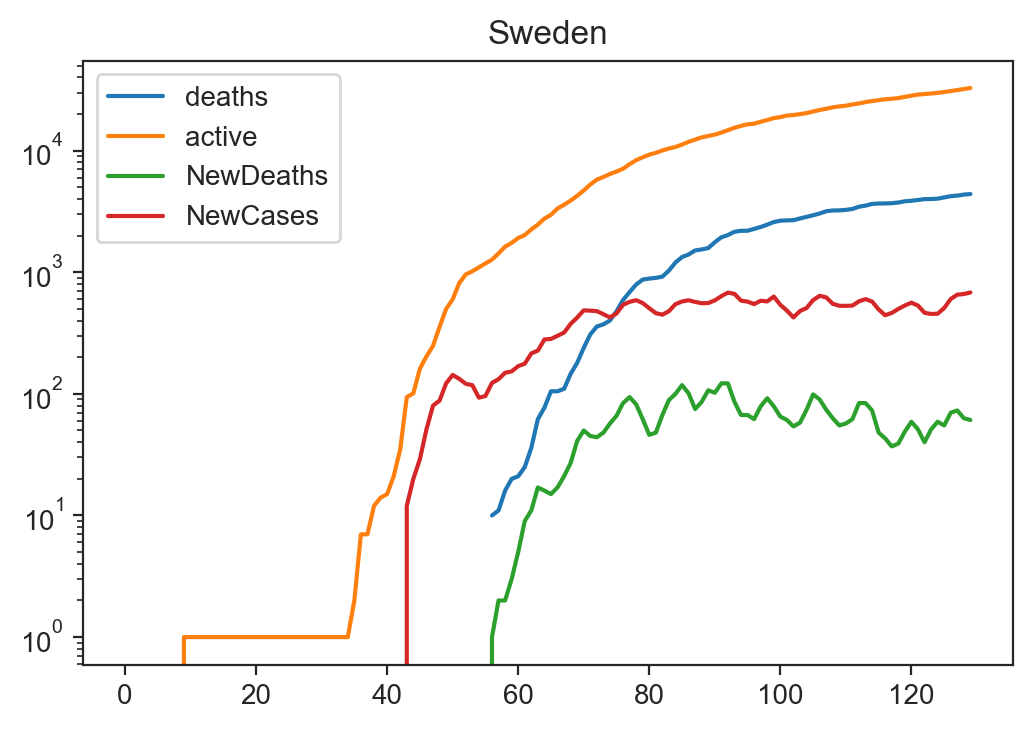

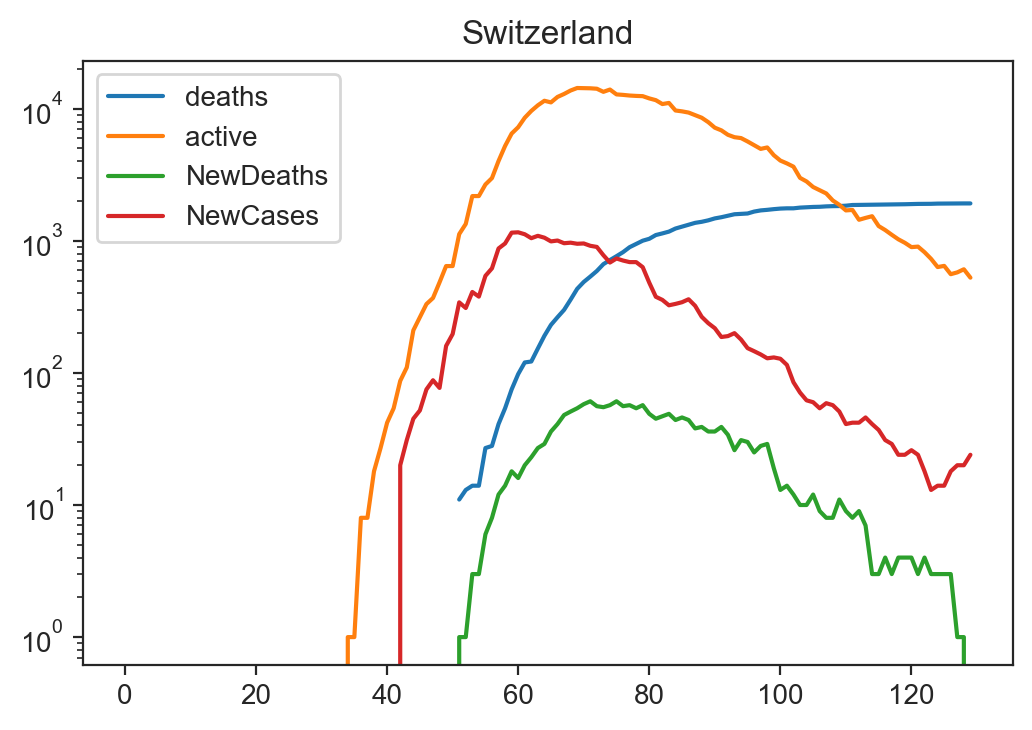

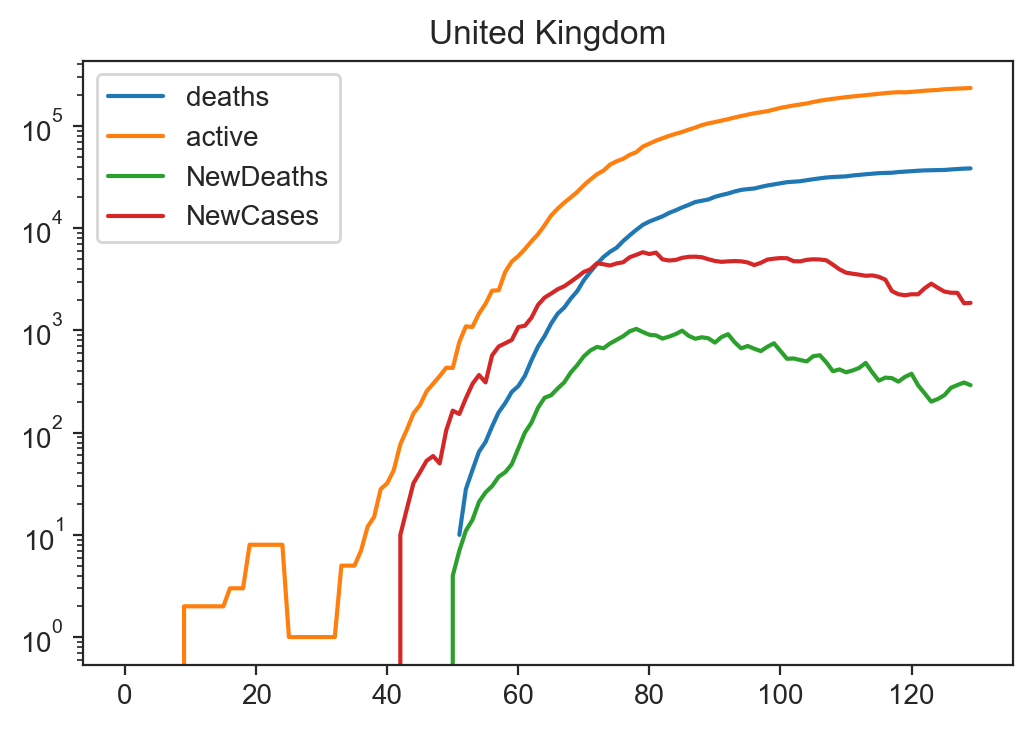

In [10]:
print(data.Ds[-1])
nDs = len(data.Ds)
for indx, region in enumerate(region_names):
    if data.Deaths[indx, -1] > 40 and data.Deaths[indx, -1] < 100:
        print(f"{region}, {data.Deaths[indx, -1]}")

for indx, region in enumerate(region_names):
    dts = data.Ds
    locs = np.arange(0, nDs, 7)
    xlabels = [f"{dts[ts].day}-{dts[ts].month}" for ts in locs]
    plt.figure(dpi=200)
    plt.plot(np.arange(len(dts)), data.Deaths[indx, :], label="deaths")
    plt.plot(np.arange(len(dts)), data.Active[indx, :], label="active")
    plt.plot(np.arange(len(dts)), data.NewDeaths[indx, :], label="NewDeaths")
    plt.plot(np.arange(len(dts)), data.NewCases[indx, :], label="NewCases")
    plt.legend()
    plt.yscale("log")
    plt.title(region)

In [52]:
data.Ds

[Timestamp('2020-01-22 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-23 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-24 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-25 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-26 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-27 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-28 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-29 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-30 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-31 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-01 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-02 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-03 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-04 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-05 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-06 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-07 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-08 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-09 00:00:00+0000', tz='UTC'),
 Timestamp('2020-02-10 00:00:00+0000', tz='UTC'),


In [11]:
ActiveCMs = data.ActiveCMs
_, nCMs, _ = ActiveCMs.shape

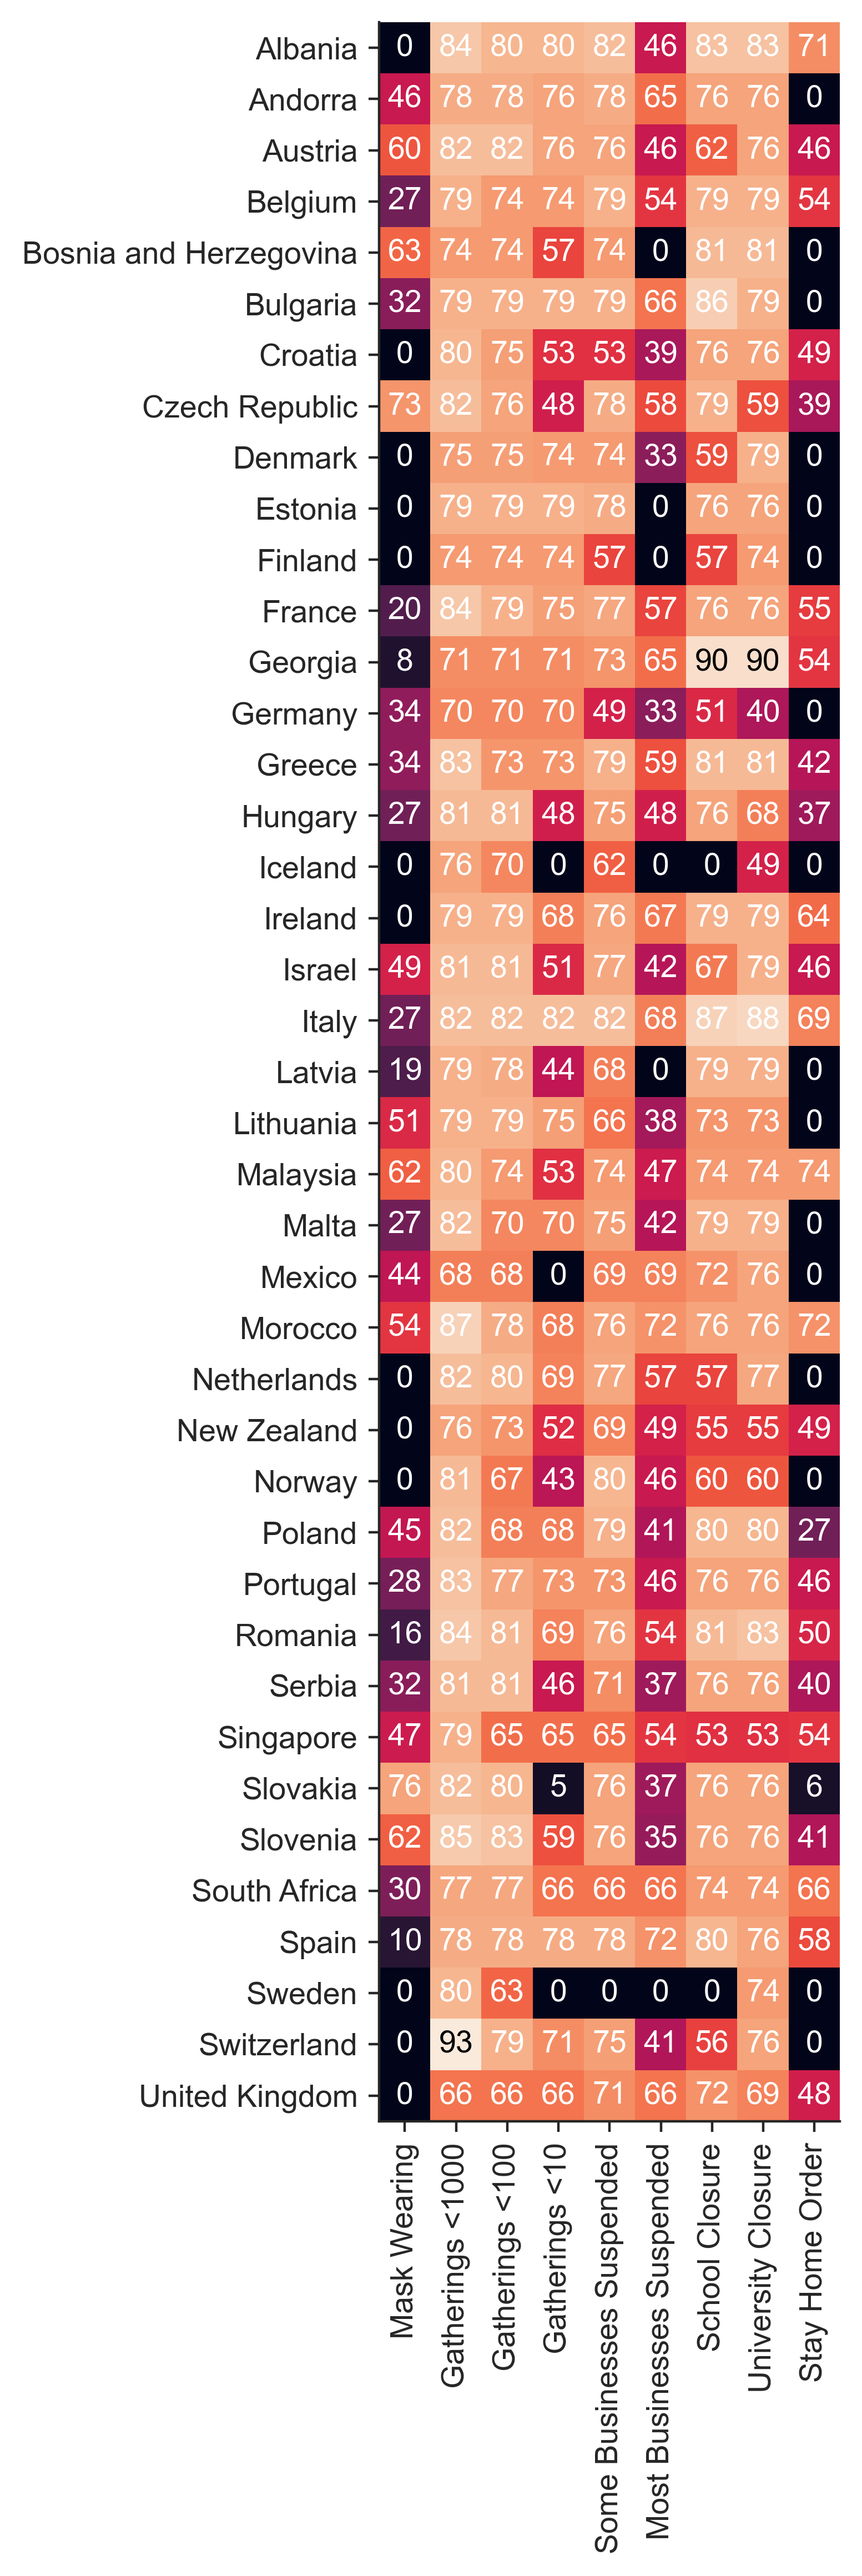

In [12]:
days_active_table = np.zeros(shape=(len(region_info), nCMs))
for d_indx, region in enumerate(region_info):
    for indx, f in enumerate(data.CMs):
        days_active_table[d_indx, indx] = np.sum(ActiveCMs[d_indx, indx, :])

fig = plt.figure(figsize=(8.3, 11.7), dpi=400)
plt.imshow(days_active_table)

for r in range(len(region_info)):
    for cm in range(len(data.CMs)):
        num = days_active_table[r, cm]
        if num < 90:
            plt.text(cm, r, f"{num:.0f}", color="white", horizontalalignment="center", verticalalignment="center")
        else:
            plt.text(cm, r, f"{num:.0f}", color="black", horizontalalignment="center", verticalalignment="center")

plt.yticks(np.arange(len(region_names)), region_names)
plt.xticks(
    np.arange(len(data.CMs)),
    [f for f in data.CMs],
    rotation=90
)
sns.despine()
plt.ylim([len(region_info)-0.5, -0.5])
plt.tight_layout()
plt.savefig("table.pdf")

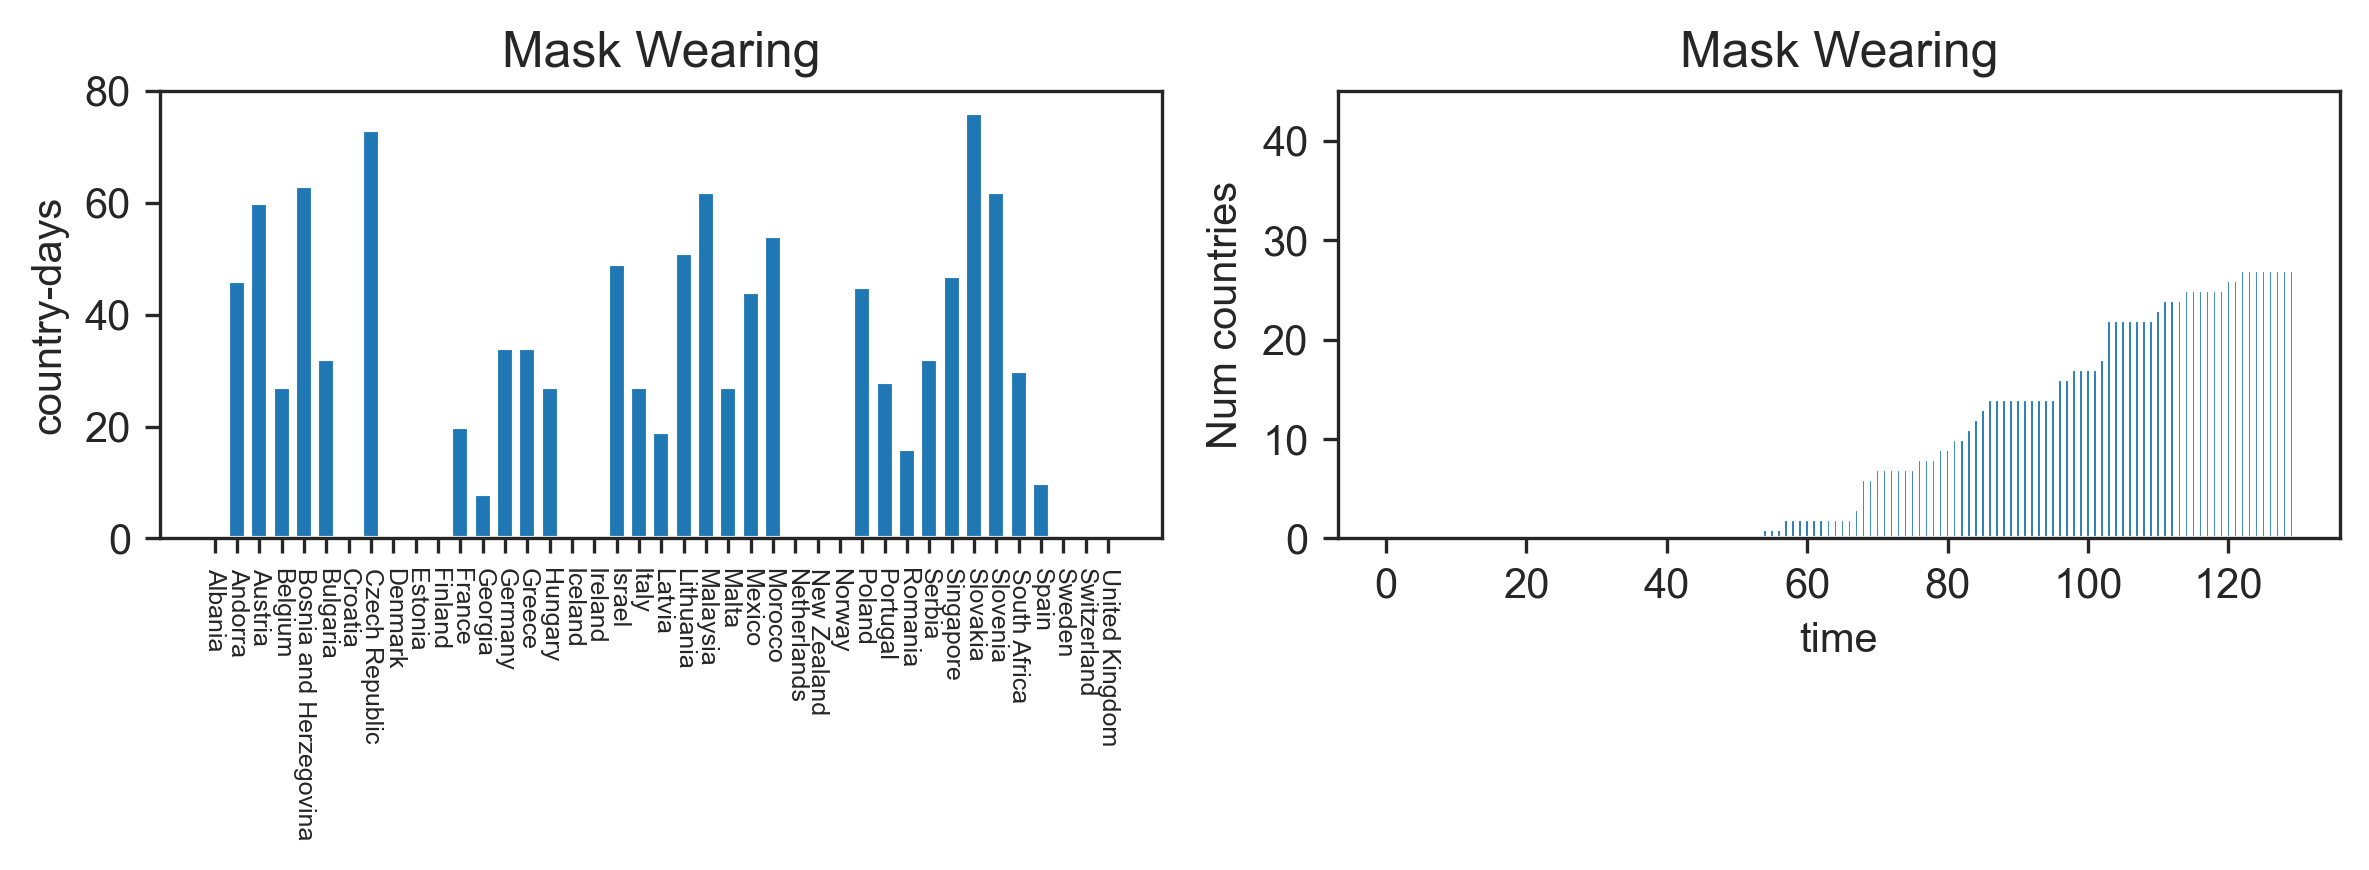

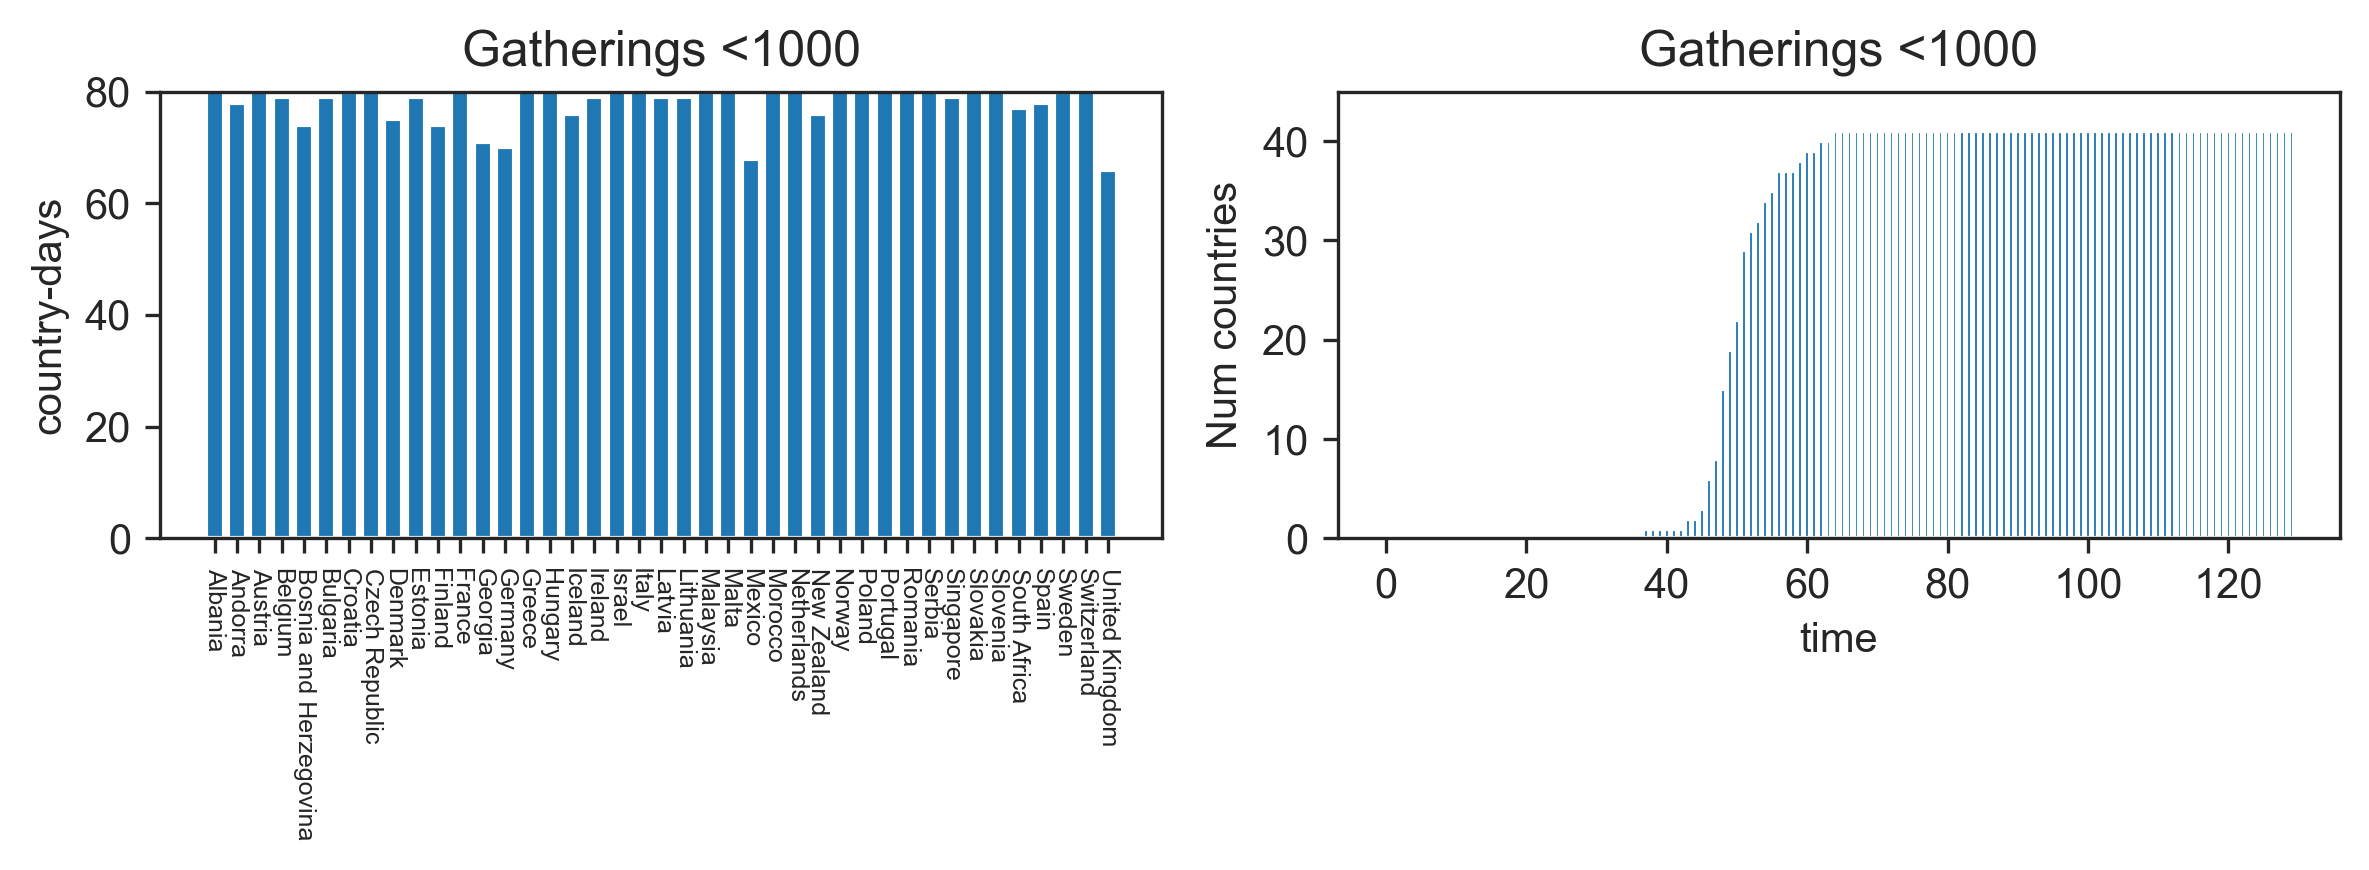

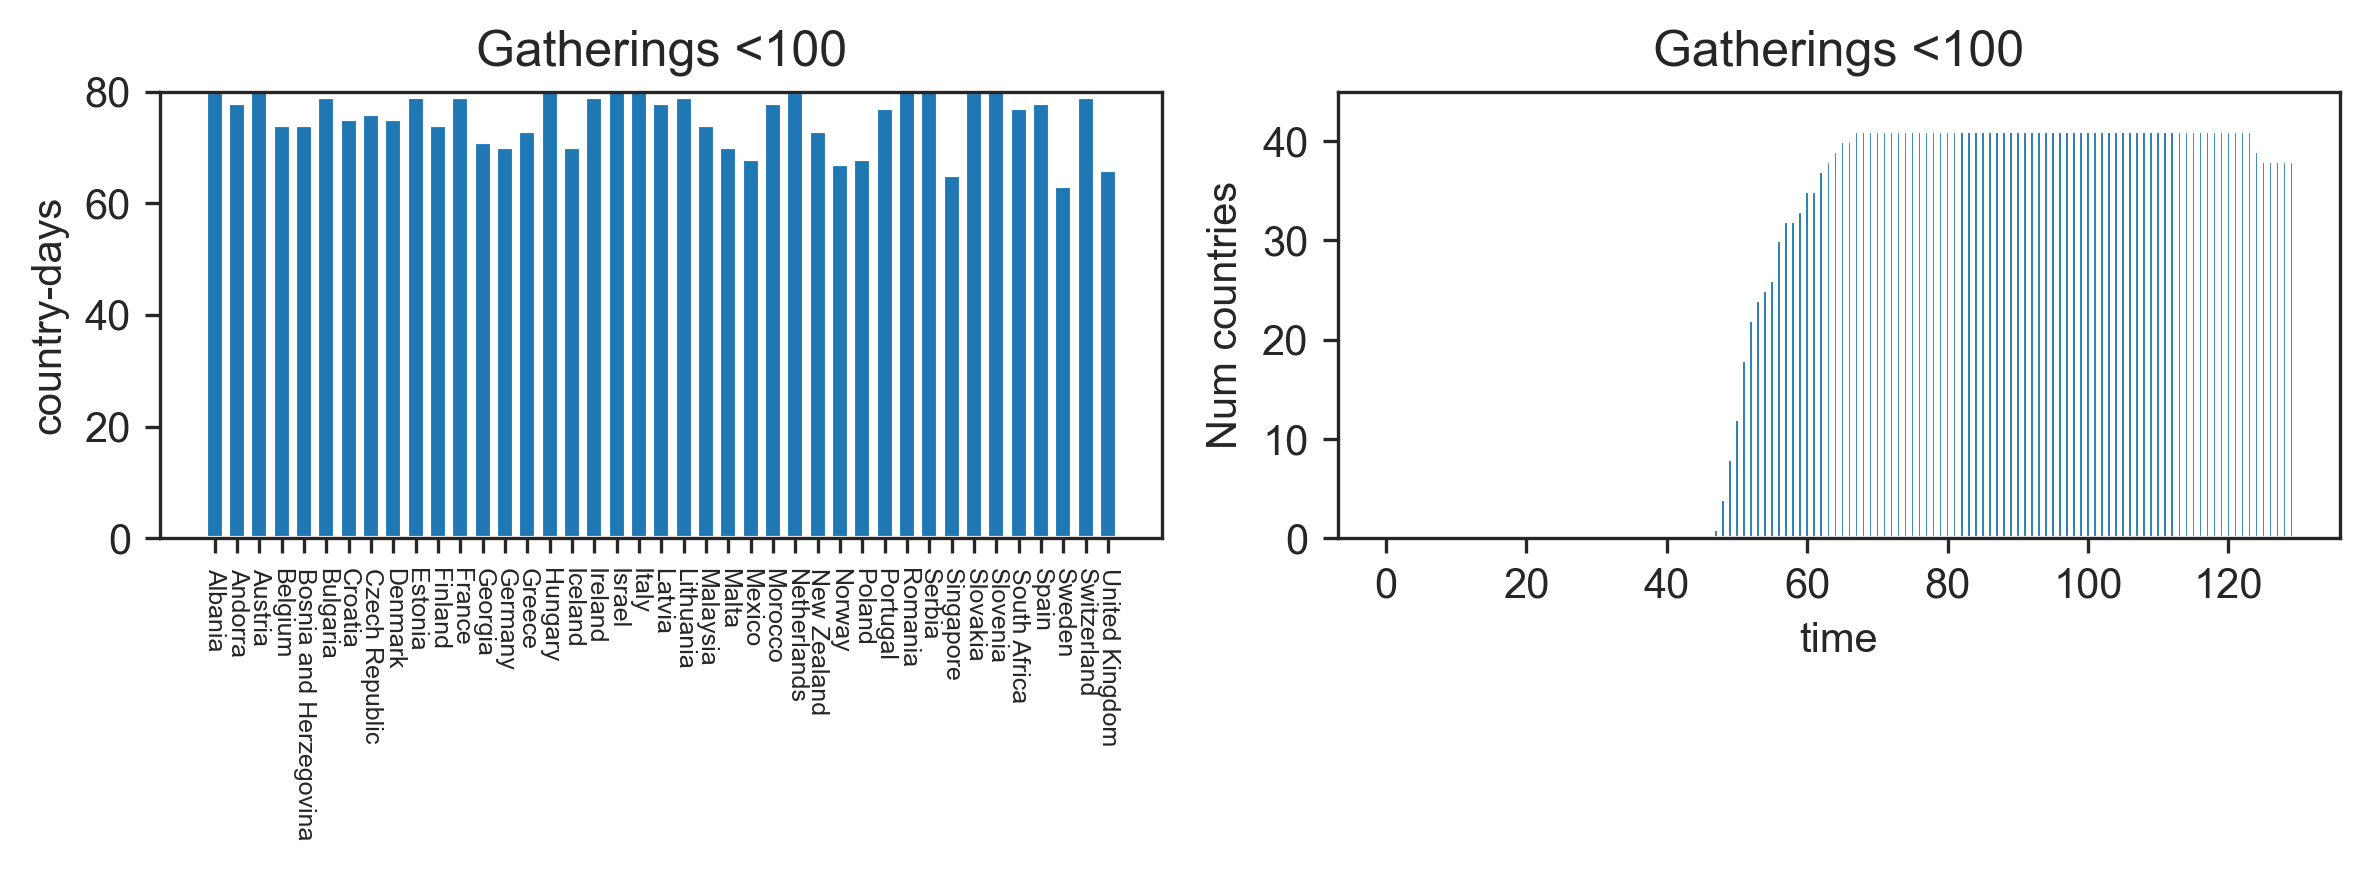

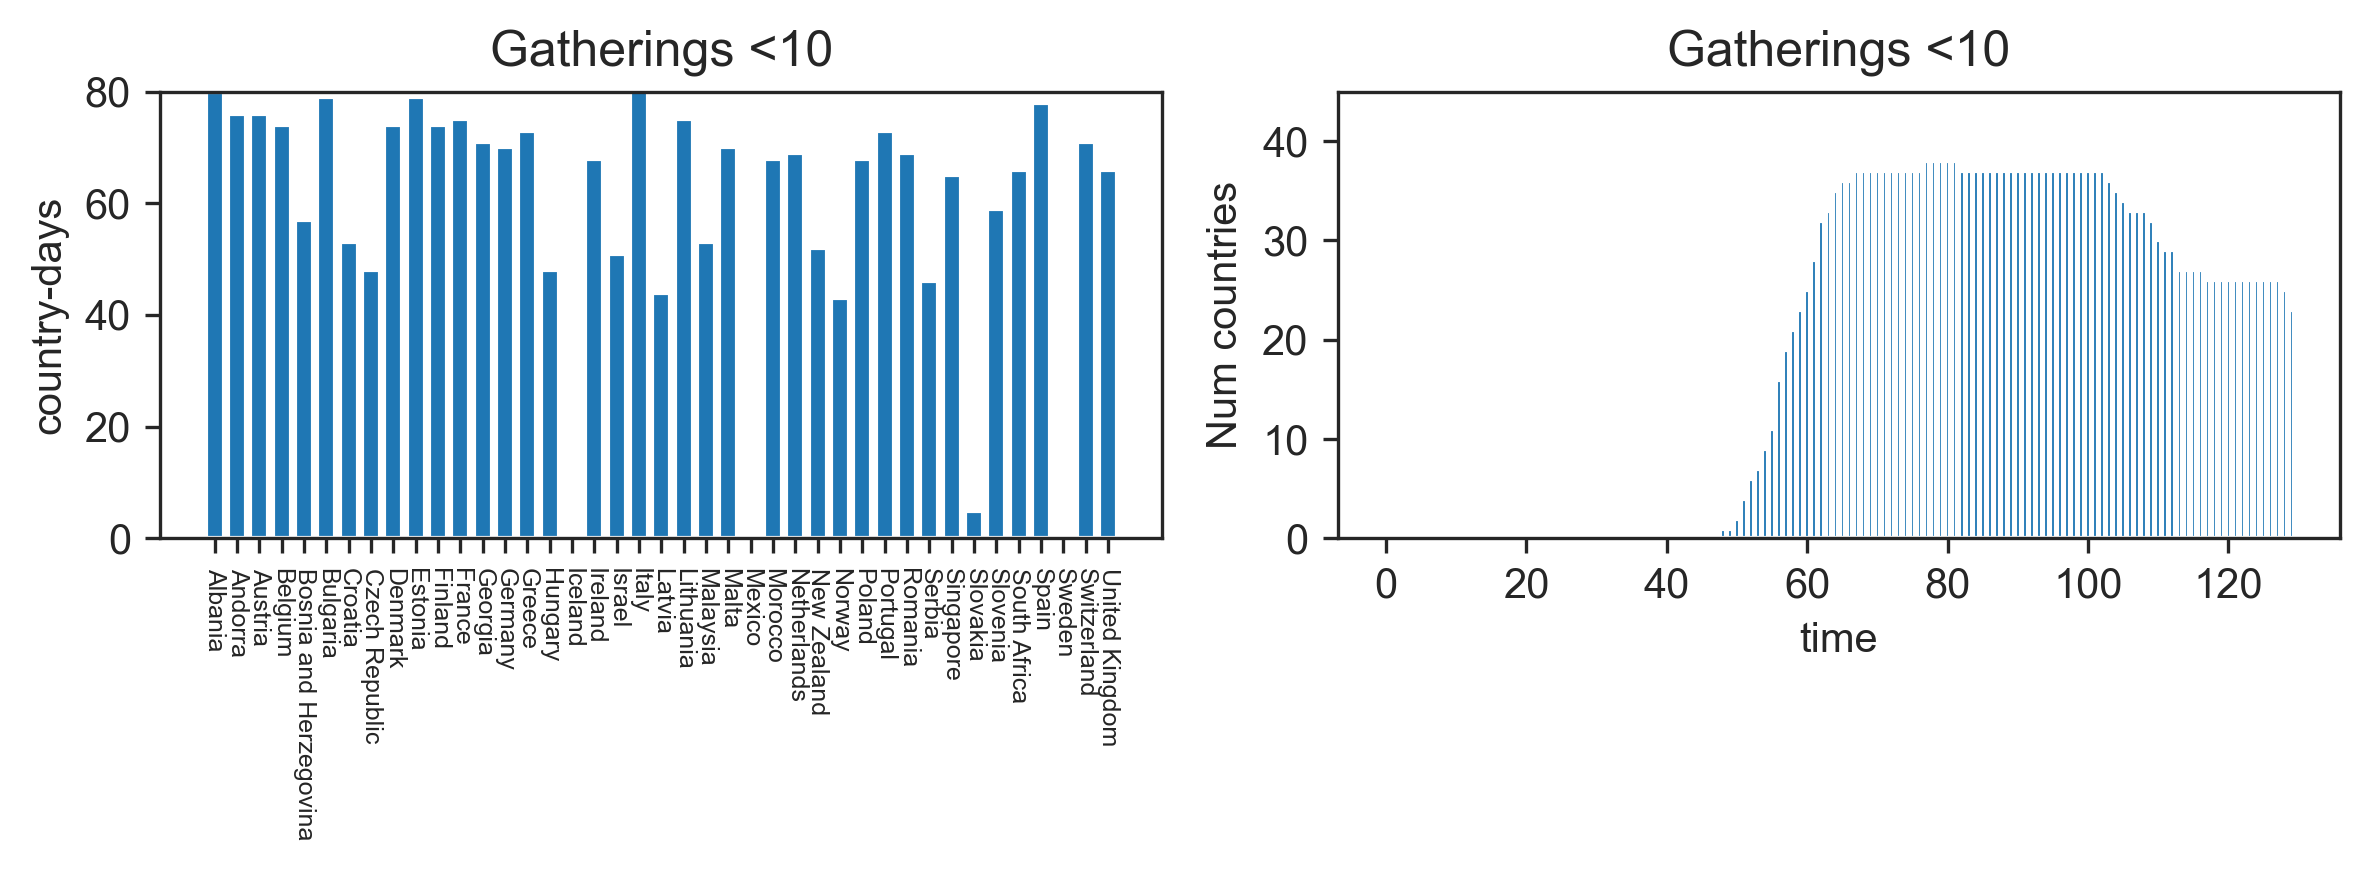

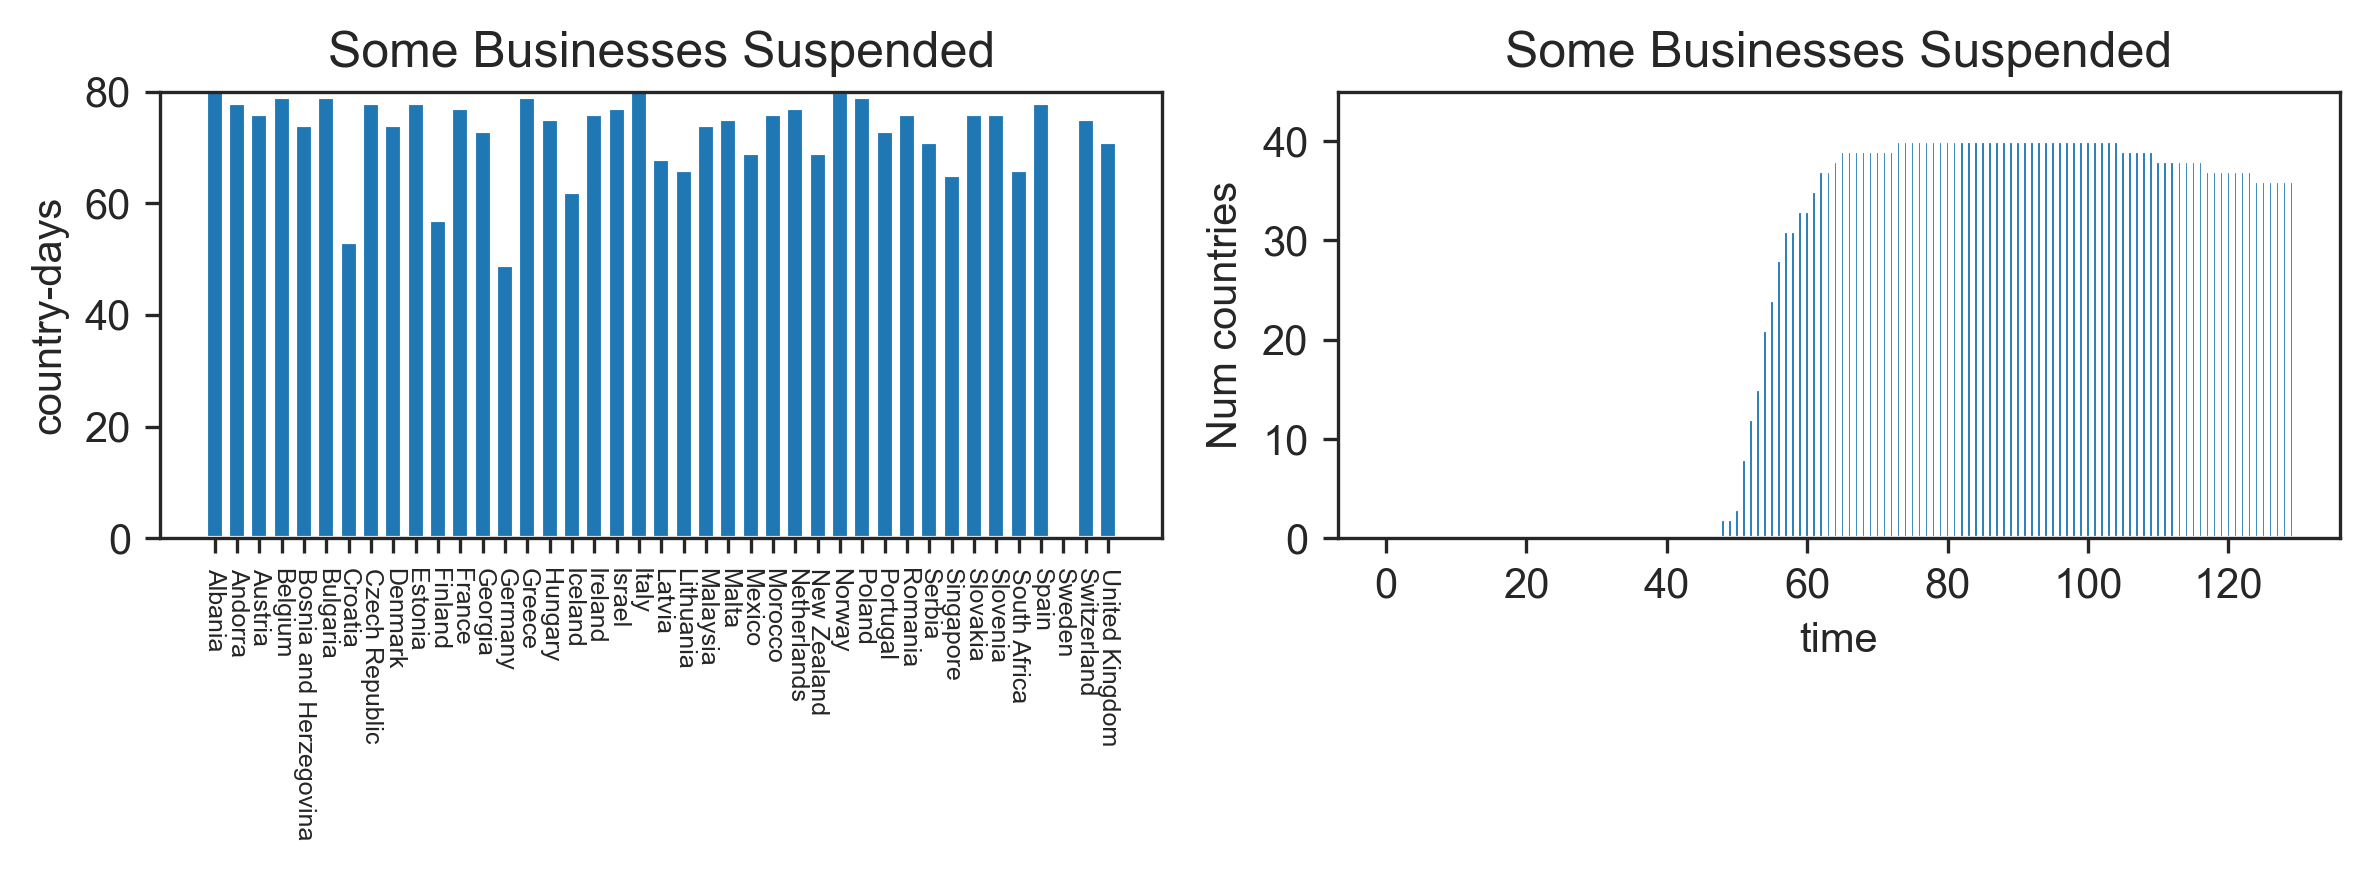

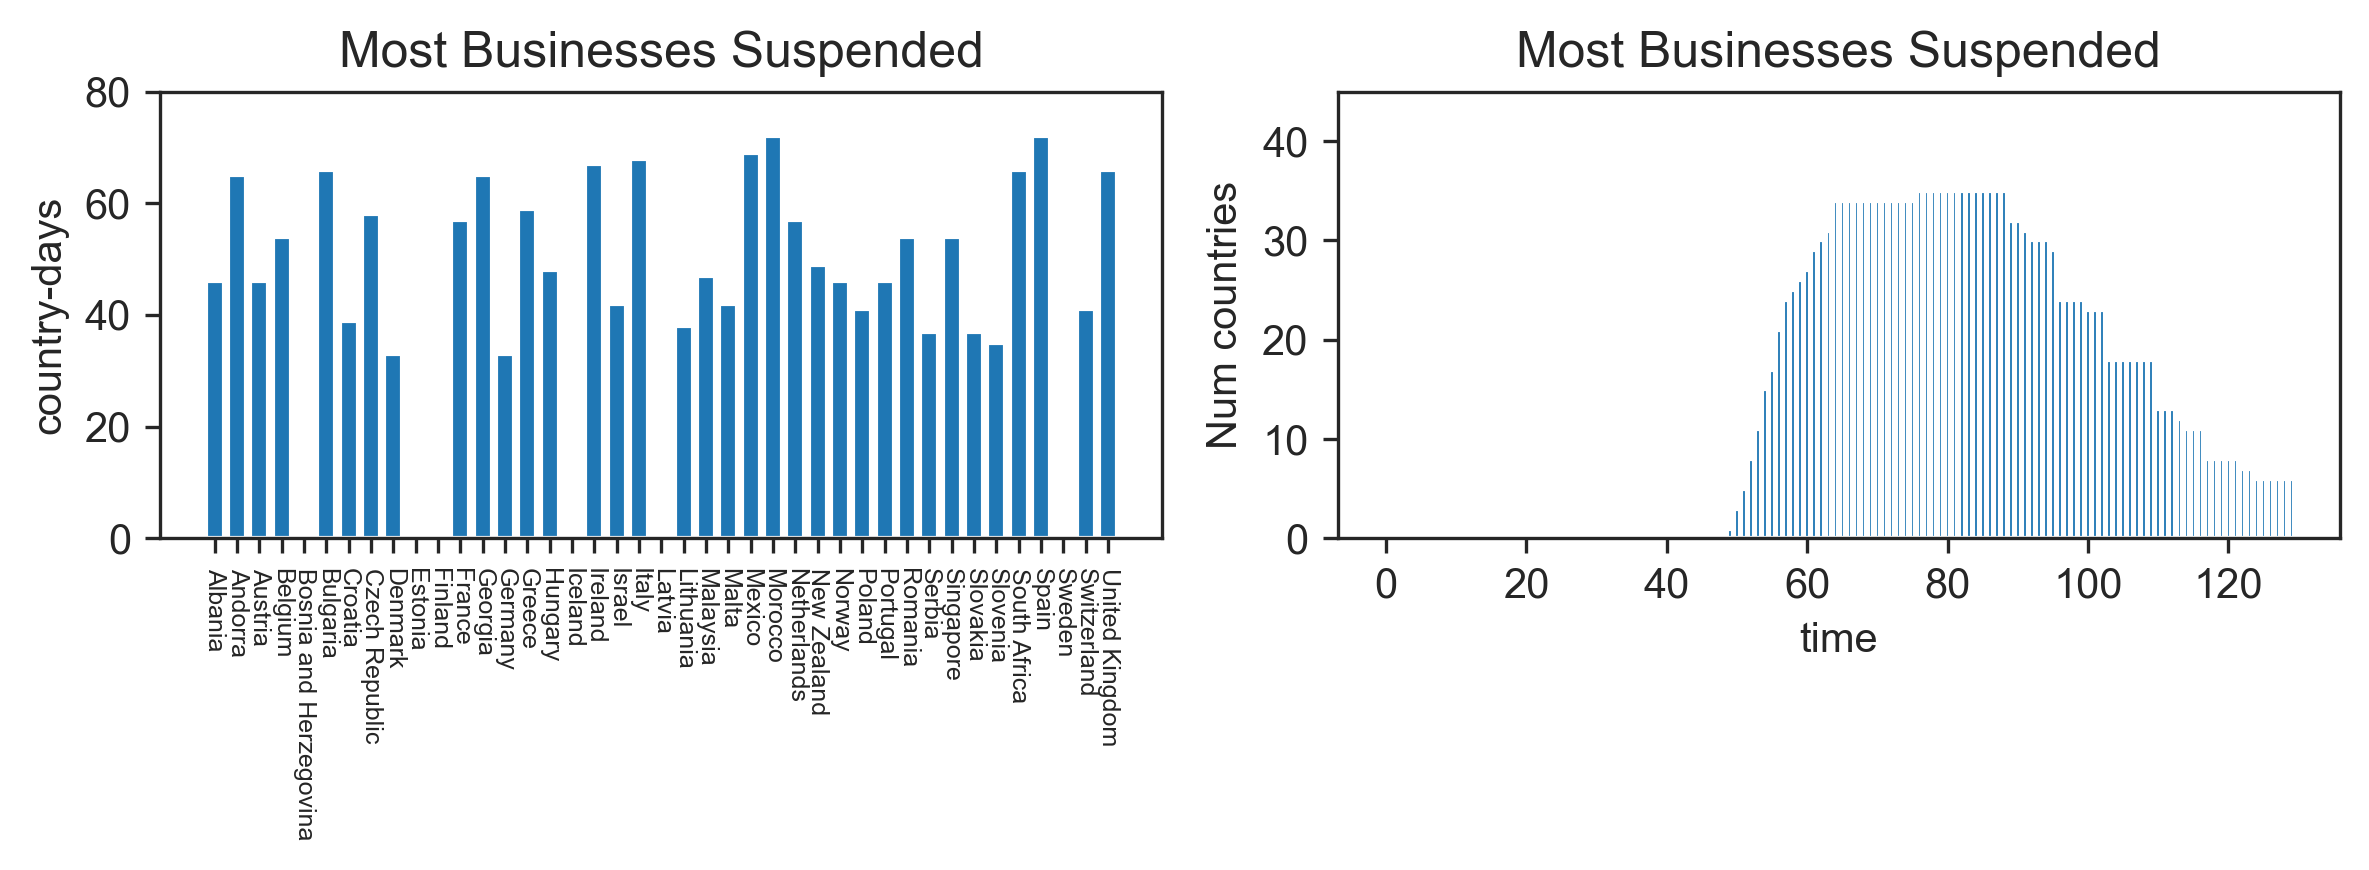

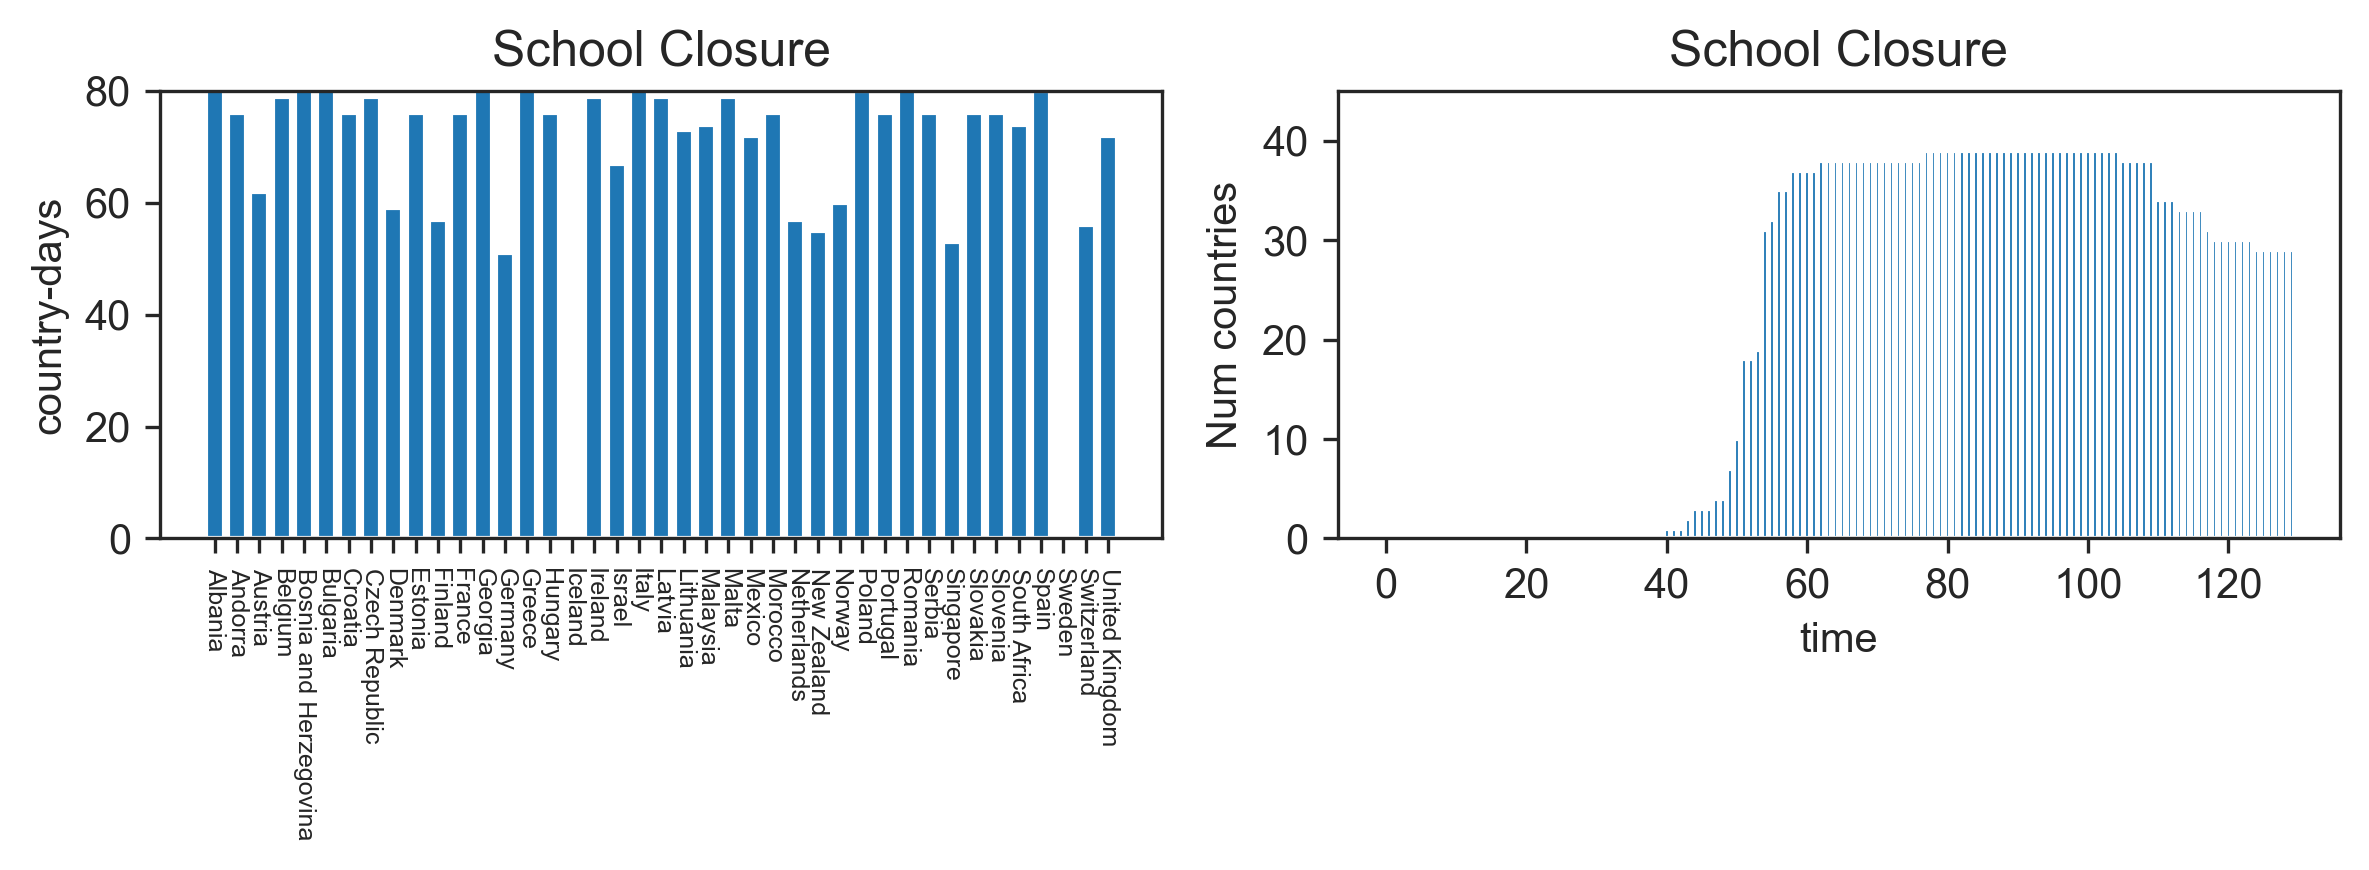

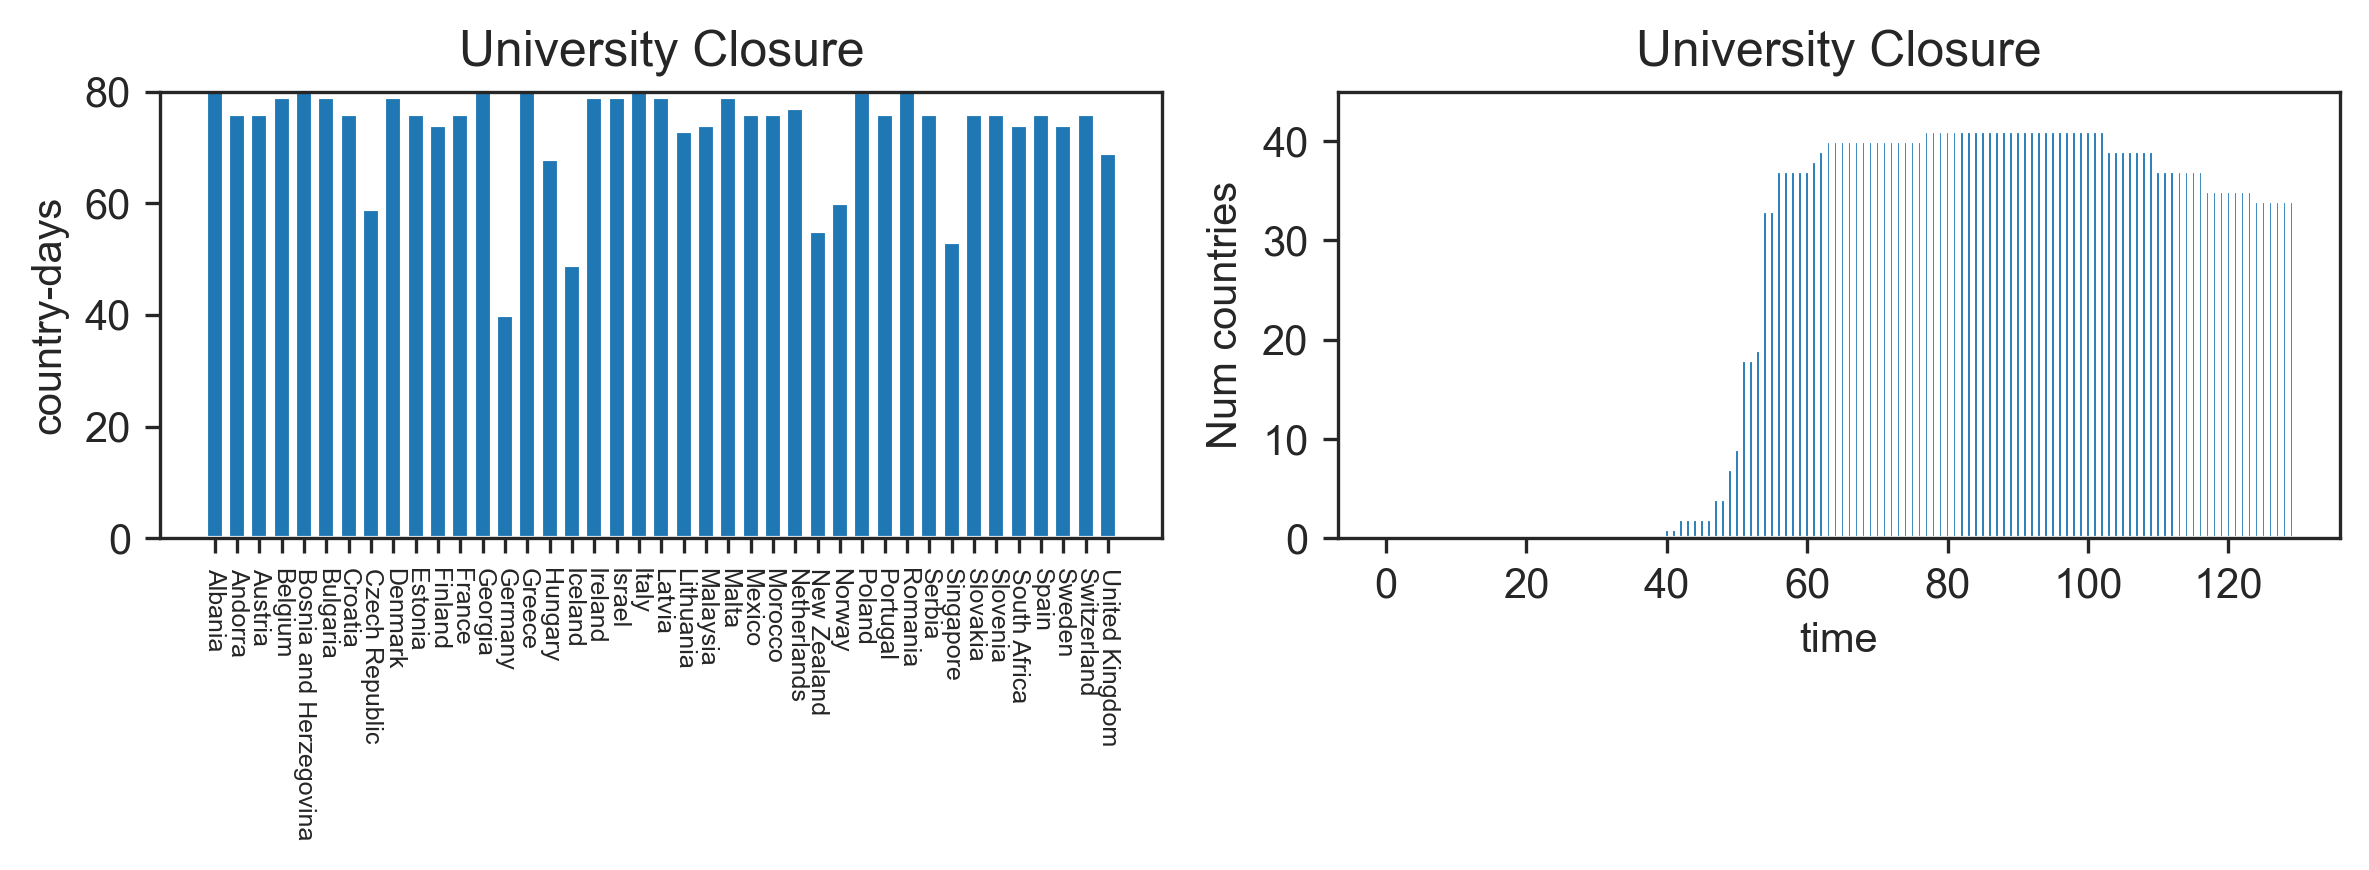

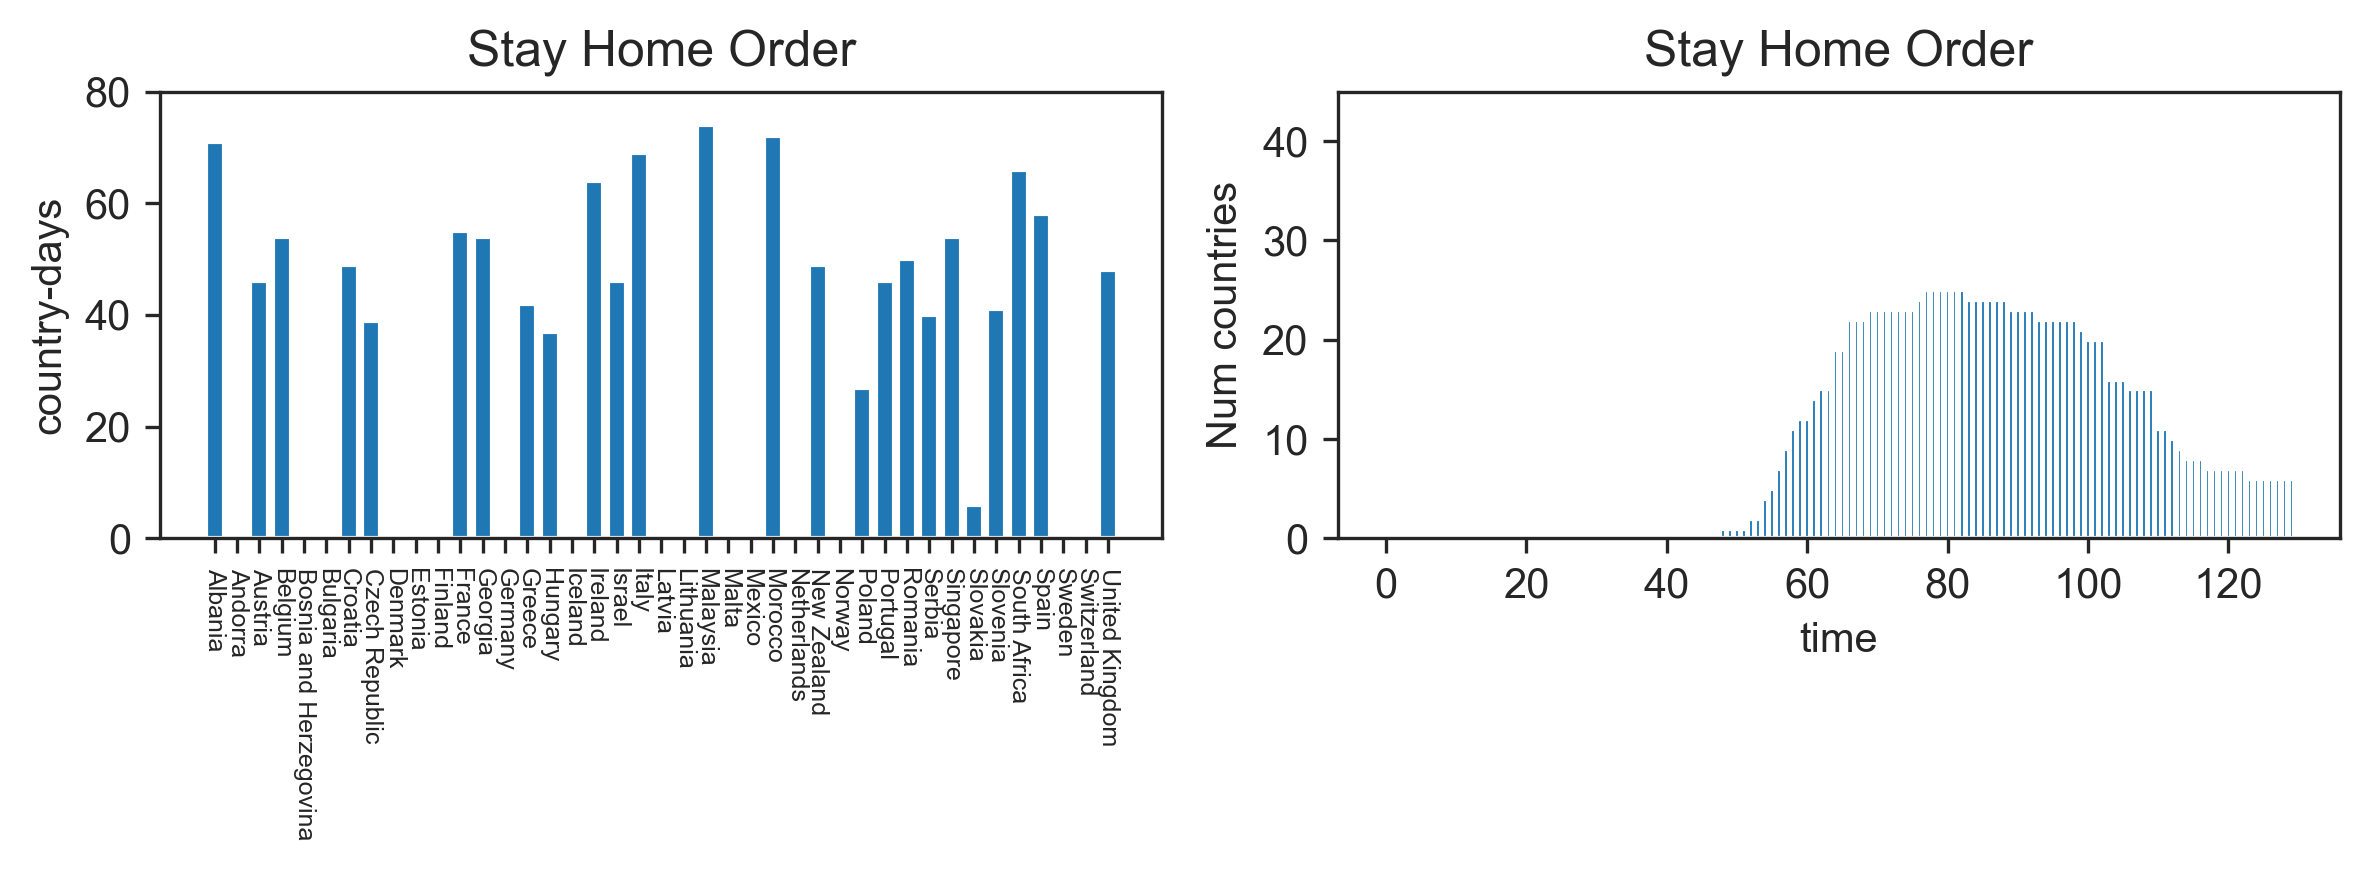

In [13]:
for indx, cm in enumerate(data.CMs):
    hist_data = np.sum(ActiveCMs[:, indx, :], axis=1)
    plt.figure(figsize=(8, 3), dpi=300)
    plt.subplot(121)
    plt.bar(np.arange(len(region_names)), hist_data)
    plt.xticks(np.arange(len(region_names)), region_names, rotation = -90, size=6)
    plt.ylim([0, 80])
    plt.ylabel("country-days")
    plt.title(cm)
    plt.subplot(122)
    hist_data = np.sum(ActiveCMs[:, indx, :], axis=0)
    plt.bar(np.arange(hist_data.size), hist_data)
    plt.title(cm)
    plt.ylim([0, 45])
    plt.ylabel("Num countries")
    plt.xlabel("time")
    plt.tight_layout()

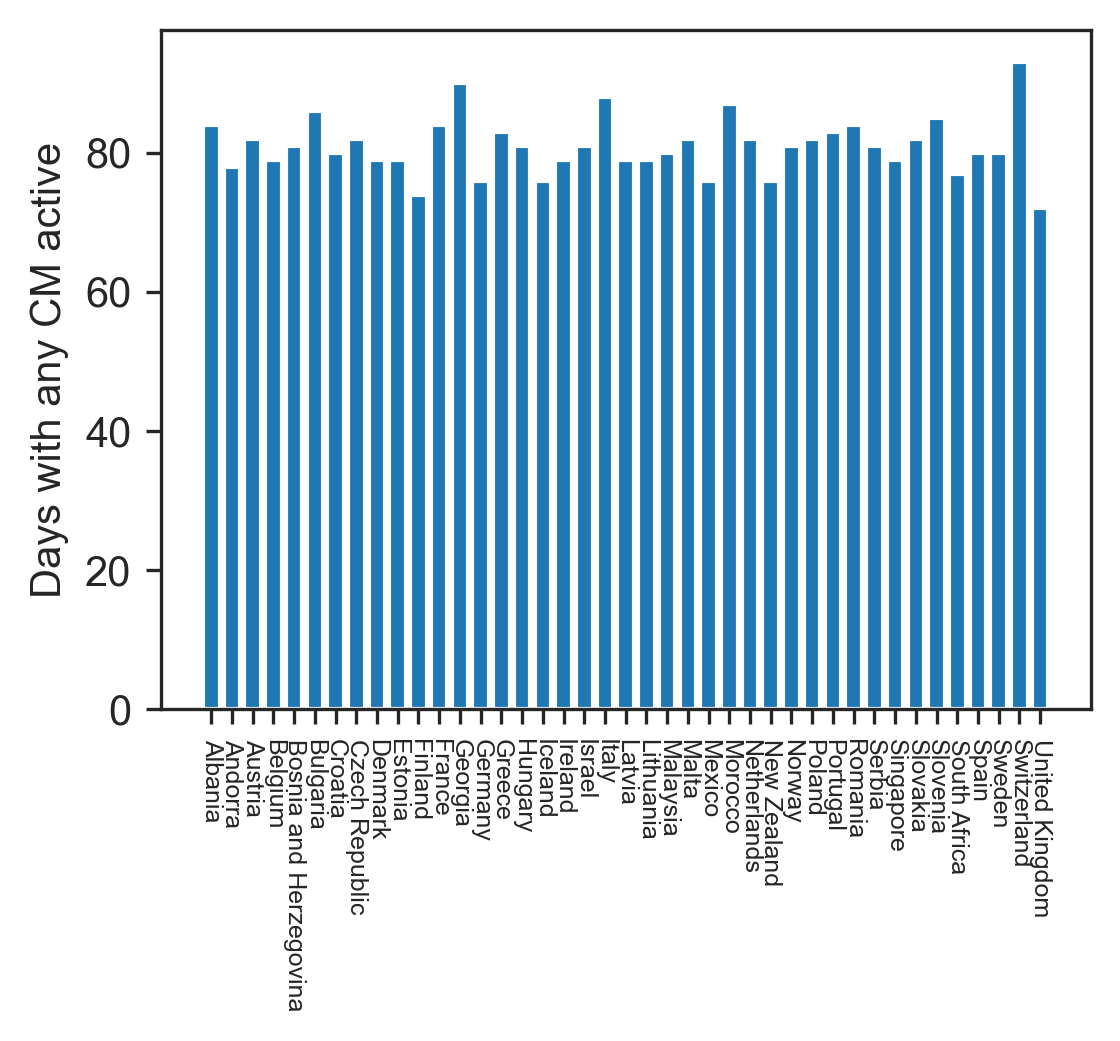

In [14]:
plt.figure(figsize=(4, 3), dpi=300)
cs = np.sum(np.sum(ActiveCMs[:, :, :], axis=1) > 0, axis=-1)
plt.bar(np.arange(len(region_names)), cs)
plt.xticks(np.arange(len(region_names)), region_names, rotation = -90, size=6)
plt.ylabel("Days with any CM active");

In [77]:
data.mask_reopenings(90)

Masking AL from 2020-04-30 00:00:00+00:00
Masking AD from 2020-05-21 00:00:00+00:00
Masking AT from 2020-05-04 00:00:00+00:00
Masking AT from 2020-05-21 00:00:00+00:00
Masking BE from 2020-05-14 00:00:00+00:00
Masking BA from 2020-05-17 00:00:00+00:00
Masking BG from 2020-05-04 00:00:00+00:00
Masking BG from 2020-05-21 00:00:00+00:00
Masking HR from 2020-04-30 00:00:00+00:00
Masking HR from 2020-05-14 00:00:00+00:00
Masking CZ from 2020-04-27 00:00:00+00:00
Masking CZ from 2020-05-14 00:00:00+00:00
Masking DK from 2020-04-23 00:00:00+00:00
Masking DK from 2020-05-14 00:00:00+00:00
Masking FI from 2020-05-17 00:00:00+00:00
Masking FR from 2020-05-14 00:00:00+00:00
Masking GE from 2020-05-26 00:00:00+00:00
Masking DE from 2020-04-23 00:00:00+00:00
Masking DE from 2020-05-07 00:00:00+00:00
Masking DE from 2020-05-09 00:00:00+00:00
Masking GR from 2020-05-07 00:00:00+00:00
Masking GR from 2020-05-14 00:00:00+00:00
Masking HU from 2020-05-07 00:00:00+00:00
Masking HU from 2020-05-21 00:00:0

In [78]:
data.mask_reopenings(0)

Masking AL from 2020-04-30 00:00:00+00:00
Masking AD from 2020-05-21 00:00:00+00:00
Masking AT from 2020-05-04 00:00:00+00:00
Masking AT from 2020-05-21 00:00:00+00:00
Masking BE from 2020-05-14 00:00:00+00:00
Masking BA from 2020-05-17 00:00:00+00:00
Masking BG from 2020-05-04 00:00:00+00:00
Masking BG from 2020-05-21 00:00:00+00:00
Masking HR from 2020-04-30 00:00:00+00:00
Masking HR from 2020-05-14 00:00:00+00:00
Masking CZ from 2020-04-27 00:00:00+00:00
Masking CZ from 2020-05-14 00:00:00+00:00
Masking DK from 2020-04-23 00:00:00+00:00
Masking DK from 2020-05-14 00:00:00+00:00
Masking FI from 2020-05-17 00:00:00+00:00
Masking FR from 2020-05-14 00:00:00+00:00
Masking GE from 2020-05-26 00:00:00+00:00
Masking DE from 2020-04-23 00:00:00+00:00
Masking DE from 2020-05-07 00:00:00+00:00
Masking DE from 2020-05-09 00:00:00+00:00
Masking GR from 2020-05-07 00:00:00+00:00
Masking GR from 2020-05-14 00:00:00+00:00
Masking HU from 2020-05-07 00:00:00+00:00
Masking HU from 2020-05-21 00:00:0

In [40]:
from matplotlib.font_manager import FontProperties
fp2 = FontProperties(fname=r"/Users/mrinank/workspace/fonts/Font Awesome 5 Free-Solid-900.otf")


display_with = [
    [], [2, 3], 
    [3], [], [5], [], [], [], []
]


cm_plot_style = [
#             ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf0c0", "darkgrey"), # ppl
            ("\uf0c0", "dimgrey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2
            ("\uf549", "black"), # school
            ("\uf19d", "black"), # university
            ("\uf965", "black"), # home
            ("\uf072", "grey"), # plane1
            ("\uf072", "black"), # plane2
            ("\uf238", "black"), # train
            ("\uf1b9", "black"), # car
            ("\uf641", "black") # flyer
        ]


In [35]:
for d, f in zip(display_with, data.CMs):
    for i in d:
        print(f"Display {f} with {data.CMs[i]}")

Display Gatherings <1000 with Gatherings <100
Display Gatherings <1000 with Gatherings <10
Display Gatherings <100 with Gatherings <10
Display Some Businesses Suspended with Most Businesses Suspended


In [17]:
def month_to_str(x):
    if x == 1:
        return "JAN"
    if x == 2:
        return "FEB"
    if x == 3:
        return "MAR"
    if x == 4:
        return "APR"
    if x == 5:
        return "MAY"

/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


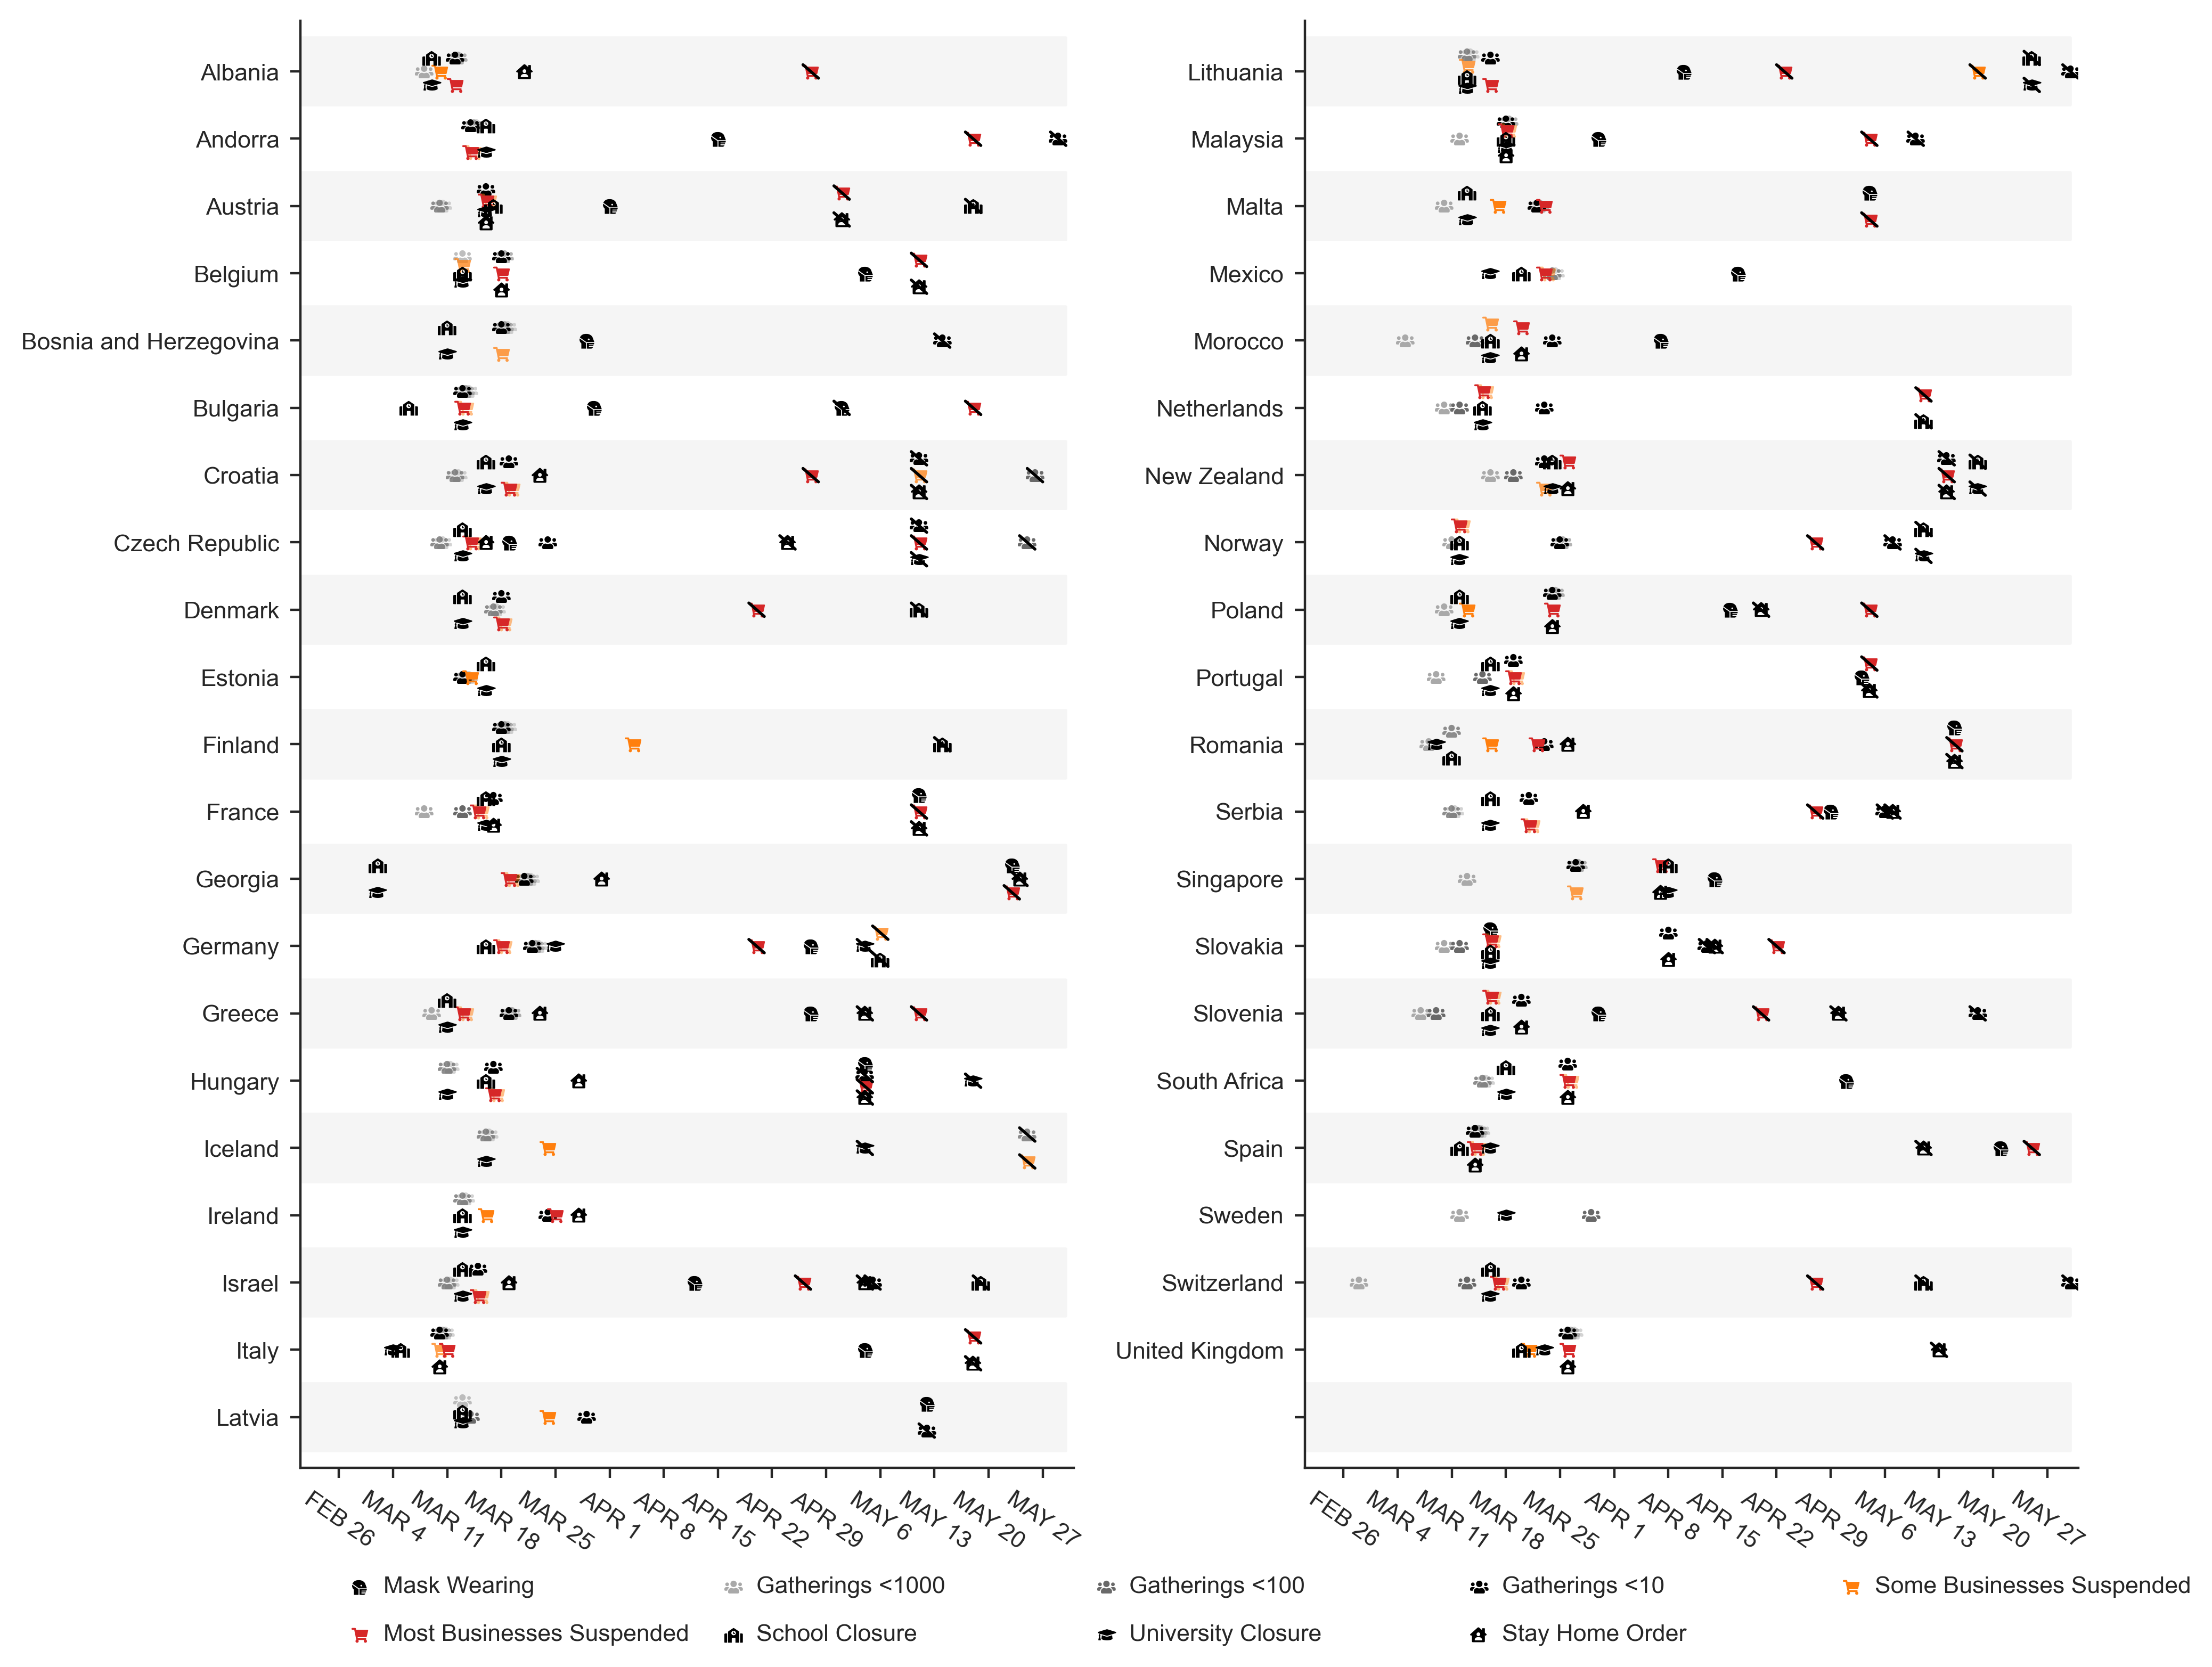

In [46]:
import matplotlib

dts = data.Ds
nDs = len(dts)
nRs = len(data.Rs)

x_min = 30
x_max = nDs

fig = plt.figure(figsize=(10, 7.5), dpi=400, constrained_layout=True)

spread_small = 0.4
spread_large = 0.5

plt.subplot(121)
for height in range(0, int(nRs/2)+1, 2):
    plt.fill_between(np.arange(x_min, nDs), -(height-0.5)* np.ones((nDs - x_min)), -(height+0.5)* np.ones((nDs - x_min)), color="whitesmoke")

days_x = np.arange(len(dts))

for d_indx, region in enumerate(region_info[:21]):
    all_cm_values = ActiveCMs[d_indx, :, :]
    region_height = -d_indx
    
    a_cm_changes = np.zeros_like(all_cm_values)
    a_cm_changes[:, 1:] = (all_cm_values[:, 1:] - all_cm_values[:, :-1])
    
    all_cm_changes = np.zeros(all_cm_values[0, :].size)
    all_cm_changes[1:] = np.sum((all_cm_values[:, 1:] - all_cm_values[:, :-1])!= 0 , axis=0)
    all_cm_changes[0] = np.sum(all_cm_values[:, 0])
    cum_changes = np.zeros(all_cm_changes.size)
    
    for indx, f in enumerate(data.CMs):
        cm_values = all_cm_values[indx, :]
        cm_changes = np.zeros(cm_values.size)
        cm_changes[1:] = cm_values[1:] - cm_values[:-1]
        cm_changes[0] = 1 if cm_values[0] == 1 else 0
        
        nz = (np.nonzero(cm_changes)[0]).tolist()
        
        for nz_val in nz:
            all_changes = all_cm_changes[nz_val]
            delta_x = 0
            alpha = 1
            height = region_height
                        
            if all_changes > 1:
                effective_changes = 0
                for cm in range(nCMs):
                    if a_cm_changes[cm, nz_val] != 0:
                        if len(display_with[cm]) > 0:
                            for other_display in display_with[cm]:
                                if a_cm_changes[other_display, nz_val] == 1.0:
                                    break
                                else:
                                    effective_changes += 1
                        else:
                            effective_changes += 1

                if effective_changes > 2:
                    spread = spread_large
                else:
                    spread = spread_small
                
                if effective_changes > 1:
                    height = (region_height + spread/2) - ((spread/(effective_changes-1)) * cum_changes[nz_val])
                else:
                    height = region_height
                
                if len(display_with[indx]) > 0:
                    for other_display in display_with[indx]:
                        if a_cm_changes[other_display, nz_val] != 0:
                            delta_x += 0.4
                            alpha = 0.5
                    
                    if a_cm_changes[display_with[indx][0], nz_val] == 0:
                        cum_changes[nz_val] += 1
                        alpha = 0.75
                else:
                    # if display with is empty
                    cum_changes[nz_val] += 1
                
            if cm_changes[nz_val] == 1.0:
                plt.text(nz_val + delta_x, height, cm_plot_style[indx][0], fontproperties=fp2, color=cm_plot_style[indx][1], size=5, alpha=alpha, va="center", ha="center", clip_on=True)
            
            elif cm_changes[nz_val] == -1:
                plt.text(nz_val + delta_x, height, cm_plot_style[indx][0], fontproperties=fp2,  color=cm_plot_style[indx][1], size=5, alpha=alpha, va="center", ha="center", clip_on=True, zorder=1)
                plt.plot([nz_val-1, nz_val+1], [height+0.1, height-0.1], linewidth=1, color="black", zorder=2)
            
            else:
                print(f"Something weird Region {region[0]} NPI: {f} {cm_changes[nz_val-1]}")
        
locs = np.arange(0, nDs, 7)
xlabels = [f"{month_to_str(dts[ts].month)} {dts[ts].day}" for ts in locs]

# import matplotlib.patches as patches

# rect = patches.Rectangle((x_min + 2.5, -0.5*nCMs + 0.25), 27.5, 0.5*nCMs , linewidth=1, edgecolor="black", facecolor="white")
# plt.gca().add_patch(rect)
# for indx, f in enumerate(data.CMs):
#     plt.text(x_min + 4, -0.5*indx , cm_plot_style[indx][0], fontproperties=fp2,  color=cm_plot_style[indx][1], size=7, va="center", ha="center", clip_on=True, zorder=1)
#     plt.text(x_min + 6, -0.5*indx - 0.05, f, size=8, va="center", ha="left")

plt.xticks(locs, xlabels, rotation=-35, fontsize=8)
plt.xlim([x_min, x_max])
plt.yticks(-np.arange(len(region_names)), region_names, fontsize=8)
plt.ylim([-20.75, 0.75])

plt.subplot(122)
for height in range(0, int(nRs/2)+1, 2):
    plt.fill_between(np.arange(x_min, nDs), -(height-0.5)* np.ones((nDs - x_min)), -(height+0.5)* np.ones((nDs - x_min)), color="whitesmoke")

days_x = np.arange(len(dts))

for d_indx, region in enumerate(region_info[21:]):
    all_cm_values = ActiveCMs[21 + d_indx, :, :]
    region_height = -d_indx
    
    a_cm_changes = np.zeros_like(all_cm_values)
    a_cm_changes[:, 1:] = (all_cm_values[:, 1:] - all_cm_values[:, :-1])
    
    all_cm_changes = np.zeros(all_cm_values[0, :].size)
    all_cm_changes[1:] = np.sum((all_cm_values[:, 1:] - all_cm_values[:, :-1])!= 0 , axis=0)
    all_cm_changes[0] = np.sum(all_cm_values[:, 0])
    cum_changes = np.zeros(all_cm_changes.size)
    
    for indx, f in enumerate(data.CMs):
        cm_values = all_cm_values[indx, :]
        cm_changes = np.zeros(cm_values.size)
        cm_changes[1:] = cm_values[1:] - cm_values[:-1]
        cm_changes[0] = 1 if cm_values[0] == 1 else 0
        
        nz = (np.nonzero(cm_changes)[0]).tolist()
        
        for nz_val in nz:
            all_changes = all_cm_changes[nz_val]
            delta_x = 0
            alpha = 1
            height = region_height
                        
            if all_changes > 1:
                effective_changes = 0
                for cm in range(nCMs):
                    if a_cm_changes[cm, nz_val] != 0:
                        if len(display_with[cm]) > 0:
                            for other_display in display_with[cm]:
                                if a_cm_changes[other_display, nz_val] == 1.0:
                                    break
                                else:
                                    effective_changes += 1
                        else:
                            effective_changes += 1

                if effective_changes > 2:
                    spread = spread_large
                else:
                    spread = spread_small
                
                if effective_changes > 1:
                    height = (region_height + spread/2) - ((spread/(effective_changes-1)) * cum_changes[nz_val])
                else:
                    height = region_height
                
                if len(display_with[indx]) > 0:
                    for other_display in display_with[indx]:
                        if a_cm_changes[other_display, nz_val] != 0:
                            delta_x += 0.4
                            alpha = 0.5
                    
                    if a_cm_changes[display_with[indx][0], nz_val] == 0:
                        cum_changes[nz_val] += 1
                        alpha = 0.75
                else:
                    # if display with is empty
                    cum_changes[nz_val] += 1
                
            if cm_changes[nz_val] == 1.0:
                plt.text(nz_val + delta_x, height, cm_plot_style[indx][0], fontproperties=fp2, color=cm_plot_style[indx][1], size=5, alpha=alpha, va="center", ha="center", clip_on=True)
            
            elif cm_changes[nz_val] == -1:
                plt.text(nz_val + delta_x, height, cm_plot_style[indx][0], fontproperties=fp2,  color=cm_plot_style[indx][1], size=5, alpha=alpha, va="center", ha="center", clip_on=True, zorder=1)
                plt.plot([nz_val-1, nz_val+1], [height+0.1, height-0.1], linewidth=1, color="black", zorder=2)
            
            else:
                print(f"Something weird Region {region[0]} NPI: {f} {cm_changes[nz_val-1]}")
        
locs = np.arange(0, nDs, 7)
xlabels = [f"{month_to_str(dts[ts].month)} {dts[ts].day}" for ts in locs]

# plt.plot([x_min, x_max], [-18.5, -18.5], color="k", zorder=-3)
# plt.text(x_min + 1, -(data.Rs.index("SG")-22), cm_plot_style[0][0], fontproperties=fp2,  color=cm_plot_style[1][1], size=7, va="center", ha="center", clip_on=True, zorder=1)

# import matplotlib.patches as patches

for indx, f in enumerate(data.CMs):
    fig.text(-0.015 + 0.185 + 0.175 * (indx%5), -0.03 * np.floor((indx/5)) , cm_plot_style[indx][0], fontproperties=fp2,  color=cm_plot_style[indx][1], size=5, va="center", ha="left", clip_on=True, zorder=1)
    fig.text(-0.015 + 0.2 + 0.175 * (indx%5), -0.00003 + -0.03 * np.floor((indx/5)), f, size=8, va="center", ha="left")

x,y = np.array([[0.05, 0.1, 0.9], [0.05, 0.5, 0.9]])
line = matplotlib.lines.Line2D(x, y, lw=5., color='r', alpha=0.4)
plt.gca().add_line(line)

plt.xticks(locs, xlabels, rotation=-35, fontsize=8)
plt.xlim([x_min, x_max])
plt.yticks(-np.arange(len(region_names)), region_names[21:], fontsize=8)
plt.ylim([-20.75, 0.75])

# plt.suptitle("NPI Implementation Timeline")
sns.despine()
plt.tight_layout()
plt.savefig("time.svg", bbox_inches = "tight")

In [47]:
total_cms = data.ActiveCMs
diff_cms = np.zeros_like(total_cms)
diff_cms[:, :, 1:] = total_cms[:, :, 1:] - total_cms[:, :, :-1]
rs, ds = np.nonzero(np.any(diff_cms<0, axis=1))

In [44]:
rs, ds = np.nonzero(np.any(diff_cms<0, axis=1))

In [48]:
x = np.array([0.00000000e+00, 2.24600347e-06, 3.90382088e-05, 2.34307085e-04,
                                         7.83555003e-04, 1.91221622e-03, 3.78718437e-03, 6.45923913e-03,
                                         9.94265709e-03, 1.40610714e-02, 1.86527920e-02, 2.34311421e-02,
                                         2.81965055e-02, 3.27668001e-02, 3.68031574e-02, 4.03026198e-02,
                                         4.30521951e-02, 4.50637136e-02, 4.63315047e-02, 4.68794406e-02,
                                         4.67334059e-02, 4.59561441e-02, 4.47164503e-02, 4.29327455e-02,
                                         4.08614522e-02, 3.85082076e-02, 3.60294203e-02, 3.34601703e-02,
                                         3.08064505e-02, 2.81766028e-02, 2.56165924e-02, 2.31354369e-02,
                                         2.07837267e-02, 1.86074383e-02, 1.65505661e-02, 1.46527043e-02,
                                         1.29409383e-02, 1.13695920e-02, 9.93233881e-03, 8.66063386e-03,
                                         7.53805464e-03, 6.51560047e-03, 5.63512264e-03, 4.84296166e-03,
                                         4.14793478e-03, 3.56267297e-03, 3.03480656e-03, 2.59406730e-03,
                                         2.19519042e-03, 1.85454286e-03, 1.58333238e-03, 1.33002321e-03,
                                         1.11716435e-03, 9.35360376e-04, 7.87780158e-04, 6.58601602e-04,
                                         5.48147154e-04, 4.58151351e-04, 3.85878963e-04, 3.21623249e-04,
                                         2.66129174e-04, 2.21364768e-04, 1.80736566e-04, 1.52350196e-04])

In [74]:
np.sum(x[:25])

0.61990158341027